# Part I - ProsperLoan Data Analysis And Exploration 
## By Maximilien Kpizingui


### Table of Contents


**1. Introduction<br>**
**2. Preliminary wrangling<br>**
**3. Visual assessment<br>**
**4. Programmatic assessment<br>**
**5. Cleaning the dataset<br>**
**6. Univariante exploration<br>**
**7. Bivariante exploration<br>**
**8. Multivariante exploration<br>**
**9. Conclusions<br>**
**10. References<br>**


## Introduction
The dataset subjected to our analysis in this project is from Prosper, a peer-to-peer lending platform, offering personal loans for borrowers with good to fair credit in California, United Stated. It contains 113937 observations and 81 features. The dataset can be found [here](https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv) and a detailed description of all the features can be found [here](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit). 


## Preliminary Wrangling


#### Importing all the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset using the url provided 


In [2]:
loan_df = pd.read_csv('https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv')

### Visual assessment

### Dispalying the shape of the dataset

In [3]:
loan_df.shape

(113937, 81)

### Displaying the descriptive information of the dataset

In [4]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

#### Checking the data type of the features in the dataframe

In [5]:
loan_df.dtypes

ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object

#### Checking  for missing values

In [6]:
loan_df.isnull().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

We notice there are more missing values in the dataset

#### Finding the total number of missing value in the dataset

In [7]:
loan_df.isnull().sum().sum() 

1364086

- We have 1364086 missing value in the dataset

### Programmatic assessment

#### Making a copy of the dataset

In [8]:
loan_master= loan_df.copy()

### Cleaning the dataset

#### Define
- Displaying the pecentage of the missing value in each feature
- Dropping features with missing value above 50

#### Code

- Displaying the pecentage of the missing value in each feature

In [9]:
lst = loan_master.isnull().sum()
for i in range(len(lst)) :
    if lst[i] != 0 :
        x= lst[i]
        col = loan_master.columns[i]
        y= (x/loan_master.shape[0])*100
        print("feature : " +str(i) + " ->  " + col + " -> " + str(x) + " nulls ->"+ str(round(y,2)) +" %")

feature : 3 ->  CreditGrade -> 84984 nulls ->74.59 %
feature : 6 ->  ClosedDate -> 58848 nulls ->51.65 %
feature : 7 ->  BorrowerAPR -> 25 nulls ->0.02 %
feature : 10 ->  EstimatedEffectiveYield -> 29084 nulls ->25.53 %
feature : 11 ->  EstimatedLoss -> 29084 nulls ->25.53 %
feature : 12 ->  EstimatedReturn -> 29084 nulls ->25.53 %
feature : 13 ->  ProsperRating (numeric) -> 29084 nulls ->25.53 %
feature : 14 ->  ProsperRating (Alpha) -> 29084 nulls ->25.53 %
feature : 15 ->  ProsperScore -> 29084 nulls ->25.53 %
feature : 17 ->  BorrowerState -> 5515 nulls ->4.84 %
feature : 18 ->  Occupation -> 3588 nulls ->3.15 %
feature : 19 ->  EmploymentStatus -> 2255 nulls ->1.98 %
feature : 20 ->  EmploymentStatusDuration -> 7625 nulls ->6.69 %
feature : 23 ->  GroupKey -> 100596 nulls ->88.29 %
feature : 25 ->  CreditScoreRangeLower -> 591 nulls ->0.52 %
feature : 26 ->  CreditScoreRangeUpper -> 591 nulls ->0.52 %
feature : 27 ->  FirstRecordedCreditLine -> 697 nulls ->0.61 %
feature : 28 ->  

From the above result, we are going to drop features with percentage of missing value greater than 50%

In [10]:
#Listing all the columns to drop having >50% of missing values
columnsToDrop= ["CreditGrade","ClosedDate","TotalProsperLoans","TotalProsperPaymentsBilled",
                 "OnTimeProsperPayments","ProsperPaymentsLessThanOneMonthLate","ProsperPaymentsOneMonthPlusLate",
                "ProsperPrincipalBorrowed","ProsperPrincipalOutstanding","ScorexChangeAtTimeOfListing",
                "LoanFirstDefaultedCycleNumber"]
       

- Dropping features with missing value above 50

In [11]:
#dropping the above columns
loan_master.drop(columns=columnsToDrop,inplace=True)

#### Test

In [12]:
lst = loan_master.isnull().sum()
for i in range(len(lst)) :
    if lst[i] != 0 :
        x= lst[i]
        col = loan_master.columns[i]
        y= (x/loan_master.shape[0])*100
        print("feature : " +str(i) + " ->  " + col + " -> " + str(x) + " nulls ->"+ str(round(y,2)) +" %")
      

feature : 5 ->  BorrowerAPR -> 25 nulls ->0.02 %
feature : 8 ->  EstimatedEffectiveYield -> 29084 nulls ->25.53 %
feature : 9 ->  EstimatedLoss -> 29084 nulls ->25.53 %
feature : 10 ->  EstimatedReturn -> 29084 nulls ->25.53 %
feature : 11 ->  ProsperRating (numeric) -> 29084 nulls ->25.53 %
feature : 12 ->  ProsperRating (Alpha) -> 29084 nulls ->25.53 %
feature : 13 ->  ProsperScore -> 29084 nulls ->25.53 %
feature : 15 ->  BorrowerState -> 5515 nulls ->4.84 %
feature : 16 ->  Occupation -> 3588 nulls ->3.15 %
feature : 17 ->  EmploymentStatus -> 2255 nulls ->1.98 %
feature : 18 ->  EmploymentStatusDuration -> 7625 nulls ->6.69 %
feature : 21 ->  GroupKey -> 100596 nulls ->88.29 %
feature : 23 ->  CreditScoreRangeLower -> 591 nulls ->0.52 %
feature : 24 ->  CreditScoreRangeUpper -> 591 nulls ->0.52 %
feature : 25 ->  FirstRecordedCreditLine -> 697 nulls ->0.61 %
feature : 26 ->  CurrentCreditLines -> 7604 nulls ->6.67 %
feature : 27 ->  OpenCreditLines -> 7604 nulls ->6.67 %
feature :

From the dataset, the feature ending with suffix key are of no interest in our analysis. Therefore we can remove them

In [13]:
loan_master.drop(columns=["ListingKey","ListingNumber","GroupKey","LoanKey","LoanNumber","MemberKey","DateCreditPulled",'ListingCreationDate'],inplace= True )

#### Checking the dimension of the dataframe

In [14]:
loan_master.shape

(113937, 62)

#### Define
Since we still have missing value in the dataframe, we are going to remove rows which contains missing values

#### Code
Displaying the list of features containing missing values

In [15]:
loan_master.columns[loan_master.isnull().any()].tolist()

['BorrowerAPR',
 'EstimatedEffectiveYield',
 'EstimatedLoss',
 'EstimatedReturn',
 'ProsperRating (numeric)',
 'ProsperRating (Alpha)',
 'ProsperScore',
 'BorrowerState',
 'Occupation',
 'EmploymentStatus',
 'EmploymentStatusDuration',
 'CreditScoreRangeLower',
 'CreditScoreRangeUpper',
 'FirstRecordedCreditLine',
 'CurrentCreditLines',
 'OpenCreditLines',
 'TotalCreditLinespast7years',
 'InquiriesLast6Months',
 'TotalInquiries',
 'CurrentDelinquencies',
 'AmountDelinquent',
 'DelinquenciesLast7Years',
 'PublicRecordsLast10Years',
 'PublicRecordsLast12Months',
 'RevolvingCreditBalance',
 'BankcardUtilization',
 'AvailableBankcardCredit',
 'TotalTrades',
 'TradesNeverDelinquent (percentage)',
 'TradesOpenedLast6Months',
 'DebtToIncomeRatio']

#### Filtering out all the rows containing missing value from the dataframe

In [16]:
loan_master =loan_master[loan_master[loan_master.columns[loan_master.isnull().any()].tolist()].notnull().all(1)]

#### Test

In [17]:
loan_master.isnull().sum()

Term                           0
LoanStatus                     0
BorrowerAPR                    0
BorrowerRate                   0
LenderYield                    0
                              ..
PercentFunded                  0
Recommendations                0
InvestmentFromFriendsCount     0
InvestmentFromFriendsAmount    0
Investors                      0
Length: 62, dtype: int64

#### Displaying 5 sample of the dataframe

In [18]:
loan_master.sample(5)

,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
41875,60,Current,0.27462,0.2489,0.2389,0.2332,0.0890,0.1442,4.0,C,...,-60.68,0.0,0.0,0.0,0.0,1.0,0,0,0.0,50
25343,36,Completed,0.15833,0.1299,0.1199,0.1148,0.0399,0.0749,6.0,A,...,-64.59,0.0,0.0,0.0,0.0,1.0,0,0,0.0,172
47578,36,Current,0.31790,0.2786,0.2686,0.2447,0.1325,0.1122,2.0,E,...,-27.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,4
96734,36,Current,0.35797,0.3177,0.3077,0.2896,0.1650,0.1246,1.0,HR,...,-26.34,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
111223,36,Current,0.27467,0.2399,0.2299,0.2243,0.1000,0.1243,3.0,D,...,-67.29,0.0,0.0,0.0,0.0,1.0,0,0,0.0,19


#### Checking the dimension of the dataset

In [19]:
loan_master.shape

(76216, 62)

##### Checking for duplcated value in the dataframe

In [20]:
sum(loan_master.duplicated())

0

- From the above, there is not duplicated value in the dataframe

#### Checking the statistical description of the dataframe

In [21]:
loan_master.describe()

,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,...,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000
mean,42.760470,0.223901,0.193621,0.183616,0.166738,0.078611,0.095528,4.132413,6.080246,3.302259,...,-56.239783,-7.956531,355.033197,347.040439,7.216475,0.998131,0.016571,0.007518,3.877473,69.998517
std,11.744005,0.079372,0.074088,0.074088,0.067595,0.046047,0.030031,1.661460,2.360640,4.396670,...,60.755050,73.671430,1690.466623,1670.110978,116.043867,0.020572,0.187732,0.108226,112.843202,97.801415
min,12.000000,0.045830,0.040000,0.030000,-0.181600,0.004900,-0.181600,1.000000,1.000000,0.000000,...,-589.950000,-4865.080000,-94.200000,-437.680000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,36.000000,0.161570,0.134900,0.124900,0.114800,0.042000,0.074080,3.000000,4.000000,1.000000,...,-74.842500,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,36.000000,0.215660,0.184500,0.174500,0.157670,0.069900,0.091100,4.000000,6.000000,1.000000,...,-36.520000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,32.000000
75%,60.000000,0.287800,0.254900,0.244900,0.219000,0.108000,0.115000,5.000000,8.000000,3.000000,...,-15.240000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,100.000000
max,60.000000,0.423950,0.360000,0.340000,0.319900,0.366000,0.266700,7.000000,11.000000,20.000000,...,3.010000,0.000000,25000.000000,25000.000000,7780.030000,1.012500,19.000000,9.000000,11000.000000,1189.000000


In [22]:
loan_master.mode()

,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,36,Current,0.35797,0.3177,0.3077,0.2896,0.147,0.1246,4.0,C,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


- From the descriptive statistic data and its mode we notice that current is the most reccurent attribute in the LoanStatus and most applicant loan term is 36 months

### Checking the structure of the dataframe

#### Define
we are going to find the number of numerical,categorical and boolean features in the dataframe respectively

In [23]:
#finding the number of numerical features
numeric_loan_master =loan_master.select_dtypes(include=np.number)
print("number of numerical features -> ",len(numeric_loan_master.columns))

number of numerical features ->  50


In [24]:
#finding the number of categorical features
categorical_loan_master=loan_master.select_dtypes(include=np.object)
print("number of categorical> ", len(categorical_loan_master.columns))

number of categorical>  9


In [25]:
bool_loan_master =loan_master.select_dtypes(include=np.bool)
print("number of numerical features -> ",len(bool_loan_master.columns))

number of numerical features ->  3


In [26]:
loan_master.shape

(76216, 62)

### What is the structure of your dataset?

Initially the  dataset has 113937 observations and 81 features. After wrangling the data from 1364086 missing value, the dataset has **76216** observations and **63** features among which we have: <br>- 50 numerical features<br> - 9 categorical features<br> - 3 boolean features

### What is/are the main feature(s) of interest in your dataset?
The main features of interest are
-LoanStatus and ProsperScore.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
Feature that help in investigation are:<br>
- Term,
- BorrowerAPR, 
- BorrowerRate
- LenderYield, 
- ProsperRating (Alpha), 
- ListingCategory,
- Occupation, 
- EmploymentStatus, 
- IsBorrowerHomeowner,
- StatedMonthlyIncome, 
- LoanOriginalAmount, 
- LoanOriginationQuarter

## Univariate Exploration

In this section we are going to visualize hidden pattern about selected features in the dataframe


### Define function to visualize hidden patterns in within the dataset

#### Function to plot horizontal distribution 

In [27]:
def plot_horizontal_distribution(dataframe,column_name,X_label,title_name):
    plt.xlabel(X_label)
    plt.title(title_name)
    color=sb.color_palette()[0]
    column_name_count=dataframe[column_name].value_counts()
    plot=sb.countplot(data=dataframe,x=column_name,color=color,order=column_name_count.index);
    return(plot)

#### Function to plot  vertical distribution

In [28]:
def plot_vertical_distribution(dataframe,column_name,X_label,title_name):
    plt.figure(figsize=[12,5])
    plt.xticks(rotation=30)
    plt.xlabel(X_label,fontsize=14)
    plt.title(title_name.title(),weight='bold')
    color=sb.color_palette()[0]
    column_name_count=dataframe[column_name].value_counts()
    plot=sb.countplot(data=dataframe,x=column_name,color=color,order=column_name_count.index);
    return(plot)

#### Function to plot histogram

In [29]:
def plot_histogram(dataframe,column_name,X_label,title_name,bin_stip):
    plt.figure(figsize=[12,5])
    plt.xticks(rotation=30)
    plt.xlabel(X_label,fontsize=14)
    plt.ylabel("Frequency",fontsize=14)
    plt.title(title_name.title(),weight='bold')
    bins=np.arange(dataframe[column_name].min(),dataframe[column_name].max()+bin_stip,bin_stip)
    plot=plt.hist(data=dataframe,x=column_name,bins=bins);
    plt.show(plot)

In [30]:
def plot_percent(fsize,df,feature_name,lst,Xlabel,titleplot):
    plt.figure(figsize=fsize)
    color=sb.color_palette()[0]
#Converting term ot string
    df[feature_name]=df[feature_name].astype(str)
    order=lst
    sb.countplot(data=df,x=feature_name,hue=feature_name,order=order)

#labels and title
    plt.xlabel(Xlabel,fontsize=14)
    plt.ylabel("Frequency",fontsize=14)
    plt.title(titleplot.title(),weight='bold');
#displaying percentage on top of the plot
    term_count=df[feature_name].value_counts()
    locs,labels=plt.xticks()
    for loc,label in zip(locs,labels):
        count=term_count[label.get_text()]
        pct_string=["{:0.1f}%".format(100*count/df.shape[0])]
        plt.text(loc,count+2,pct_string,ha="center",fontsize=12)

### Investigation data pertaining to the borrower


#### Visualizing the distribution of employmentStatus
Do most of the loan applicant full time employed workers?

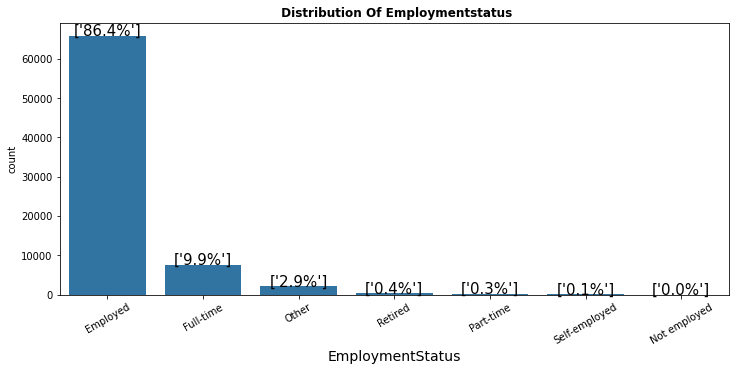

In [31]:
plot_vertical_distribution(loan_master,"EmploymentStatus","Employment status"," Distribution of employmentStatus");
# ploting the percentage above each column
column_count=loan_master["EmploymentStatus"].value_counts()
locs,labels=plt.xticks(rotation = 30)
for loc,label in zip(locs,labels):
    count=column_count[label.get_text()]
    pct_string=["{:0.1f}%".format(100*count/loan_master.shape[0])]
    plt.text(loc,count+2,pct_string,ha="center",fontsize=15)
   

- From the above distribution, we notice that 86.4% of people applying for loan are employed and 9.8% are full time workers

#### Finding the distribution of the occupation of people applying for loan at Prosper
What are the occupation of the people applying for the loan?

##### making new dataframe containing  occupations repeated  more than 25 times to avoid crowding

In [32]:
Occupation_frequency=loan_master["Occupation"].value_counts()
ind=np.sum(Occupation_frequency>25) 
most_Occupation=Occupation_frequency.index[:ind]
new_df=loan_master[loan_master["Occupation"].isin(most_Occupation)]

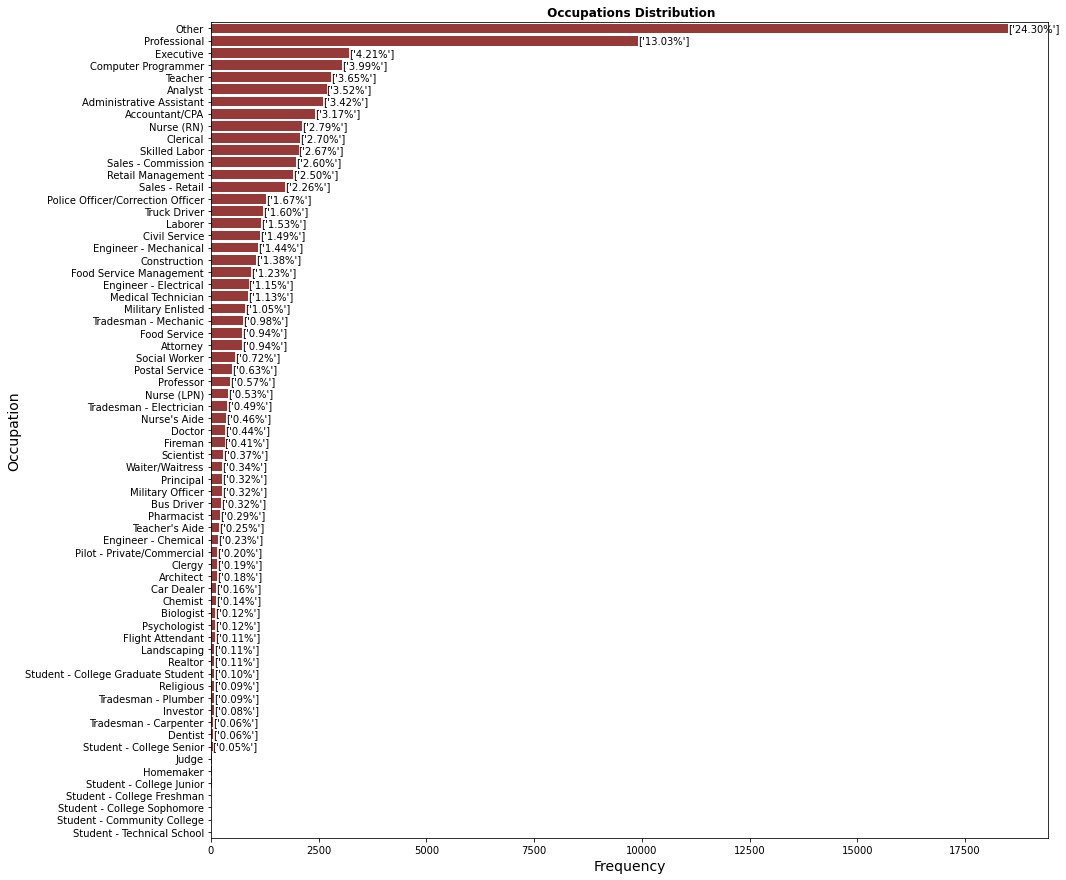

In [33]:
plt.figure(figsize=[15,15])
color=sb.color_palette()[0]
column_name_count=loan_master["Occupation"].value_counts()
plot=sb.countplot(data=loan_master,y="Occupation",color='brown',order=column_name_count.index)

#labels and title
plt.xlabel("Frequency",fontsize=14)
plt.ylabel("Occupation",fontsize=14)
plt.title(" Occupations distribution".title(),weight='bold');

#add % at the end of each bar
occupation_count=new_df["Occupation"].value_counts()
for i in range(occupation_count.shape[0]):
    count=occupation_count[i]
    pct_string=["{:0.2f}%".format(100*count/new_df.shape[0])]
    plt.text(count+1,i,pct_string,va="center")

The most people applying for the loan have their occupation listed as other. However the mojority of people applying for the loan are professional

#### What is the distribution of the income range
What is the range of the salary of the loan applicants?

$50,000-74,999    31.085336
$25,000-49,999    28.105647
$100,000+         18.338669
$75,000-99,999    17.774483
$1-24,999          4.694552
Not employed       0.001312
Name: IncomeRange, dtype: float64

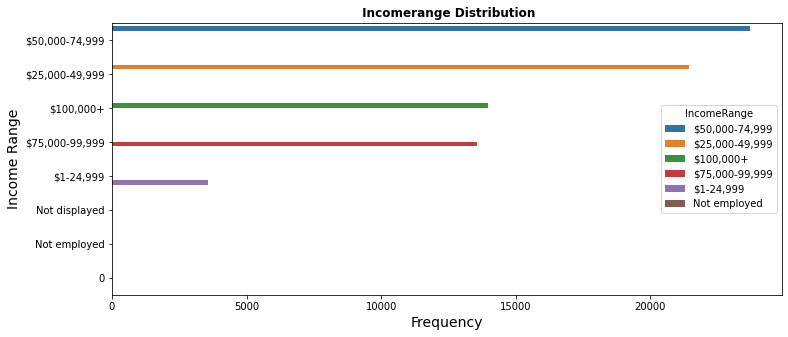

In [34]:
display((loan_master["IncomeRange"].value_counts()/loan_master.shape[0])*100)
#making the order list for the graph 
order_list=["$50,000-74,999","$25,000-49,999","$100,000+","$75,000-99,999","$1-24,999","Not displayed","Not employed","0",]
#ploting the bar chart
plt.figure(figsize=[12,5])
color=sb.color_palette()[0]
sb.countplot(data=loan_master,y="IncomeRange",hue='IncomeRange',order=order_list);
#labels and title
plt.xlabel("Frequency",fontsize=14)
plt.ylabel("Income Range",fontsize=14)
plt.title(" IncomeRange distribution".title(),weight='bold');

Among the loan applicants,  31.08% vave income betytwen 50k to 74.99k

#### Finding the distribution IsBorrowerHomeowner
Does most of the loan applicants owns a house?

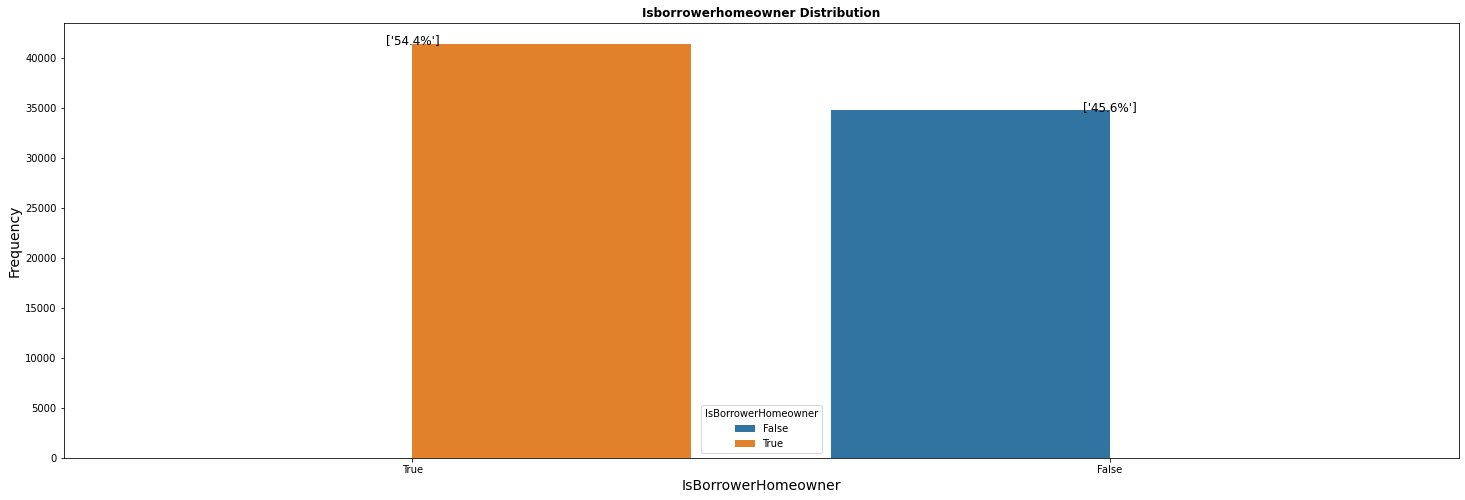

In [35]:
lst=["True","False"]
figsize=[25,8]
plot_percent(figsize,loan_master,"IsBorrowerHomeowner",lst,"IsBorrowerHomeowner","IsBorrowerHomeowner distribution")

From the above plot, 54.4% of loan applicants hava a house and 45.6% don't have a loan. 

#### Finding the distribution of Total Prosper Loans 

In [36]:
loan_master.columns

Index(['Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'LenderYield',
       'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn',
       'ProsperRating (numeric)', 'ProsperRating (Alpha)', 'ProsperScore',
       'ListingCategory (numeric)', 'BorrowerState', 'Occupation',
       'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner',
       'CurrentlyInGroup', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCredit', 'TotalTrades',
       'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months',
       'DebtToIncomeRa

From the above plot, 80.61% of loan applicant don't have past their record at prosper loan. Therefore they may be considered as first time applicant

#### Exploring features pertaining to the loans

#### Visualizing the distribution of ListingCategory  of the dataset
What is the most  used case of the loan request?

In [37]:
# making the list of unique value in the listingCategory feature
listing_cat={0:"Not Available",1:"Debt Consolidation",2:"Home Improvement", 3 :"Business", 4:"Personal Loan",
             5: "Student Use", 6:"Auto", 7:"Other", 8:"Baby&Adoption",
             9 :"Boat", 10:"Cosmetic Procedure", 11:"Engagement Ring", 12:"Green Loans",
             13:"Household Expenses", 14:"Large Purchases", 15:"Medical/Dental",
             16:"Motorcycle", 17:"RV", 18:"Taxes", 19:"Vacation", 20:"Wedding Loans"}
# remaping the keys with values from the dic
loan_df["ListingCategory (numeric)"]= loan_df["ListingCategory (numeric)"].map(listing_cat) 

In [38]:
def plot_countplot(dataframe,column_name):
    color=sb.color_palette()[0]
    column_name_count=dataframe[column_name].value_counts()
    plot=sb.countplot(data=dataframe,y=column_name,order=column_name_count.index)
    return(plot)

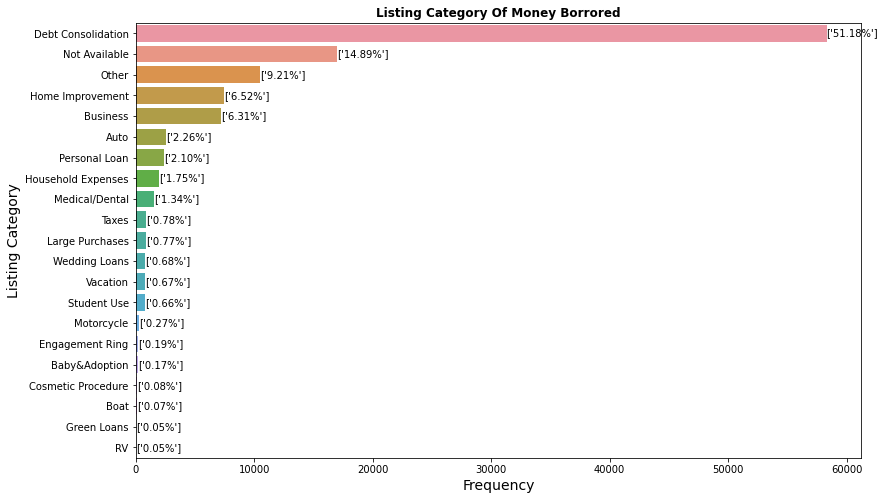

In [39]:
plt.figure(figsize=[13,8])
plot_countplot(loan_df,"ListingCategory (numeric)")
#labels and title
plt.xlabel("Frequency",fontsize=14)
plt.ylabel("Listing Category",fontsize=14)
plt.title("Listing Category of money borrored".title(),weight='bold');

#add % at the end of each bar
column_count=loan_df["ListingCategory (numeric)"].value_counts()
for i in range(column_count.shape[0]):
    count=column_count[i]
    pct_string=["{:0.2f}%".format(100*count/loan_df.shape[0])]
    plt.text(count+1,i,pct_string,va="center")

51.18% of loan fund was requested for Debt Consolidation

#### Visualizing the distribution of the term of the loan 
What is the most length of the loan preferred by the applicant?

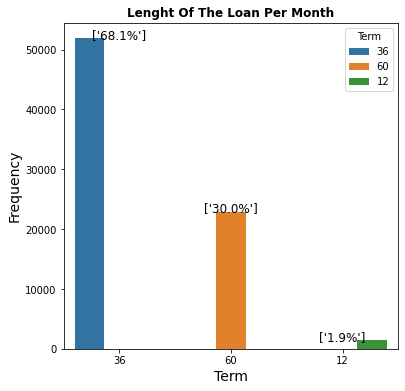

In [40]:
lst=["36","60","12"]
figsize=[6,6]
plot_percent(figsize,loan_master,"Term",lst,"Term","lenght of the loan per month")

From the above plot we notice that68.1% of loan applicant preferred to borrow money for a period of 36 month

#### Visualizing the distribution of LoanStatus 
What is the most frequent loan status historic

In [41]:
#listing the unique variable in LoanStatus feature
list(loan_master['LoanStatus'].unique())

['Current',
 'Past Due (1-15 days)',
 'Defaulted',
 'Completed',
 'Chargedoff',
 'Past Due (16-30 days)',
 'Past Due (61-90 days)',
 'Past Due (31-60 days)',
 'Past Due (91-120 days)',
 'FinalPaymentInProgress',
 'Past Due (>120 days)']

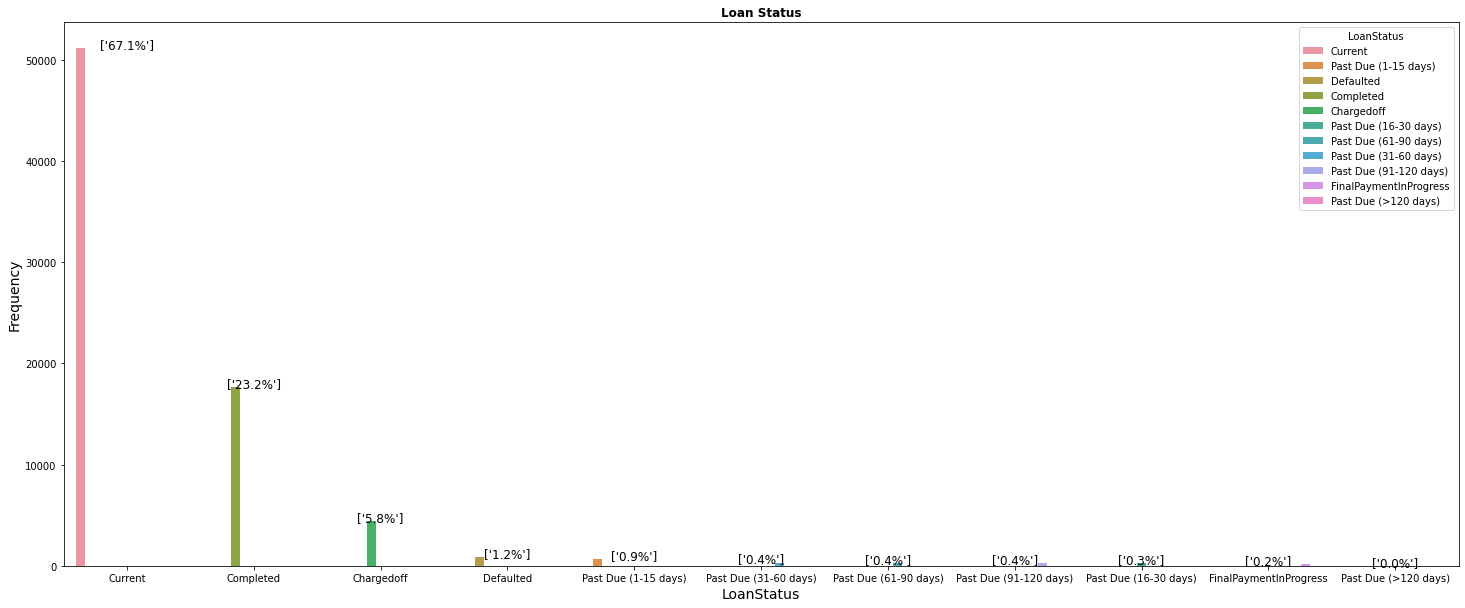

In [42]:
lst=["Current","Completed","Chargedoff","Defaulted","Past Due (1-15 days)",
       "Past Due (31-60 days)","Past Due (61-90 days)","Past Due (91-120 days)",
      "Past Due (16-30 days)","FinalPaymentInProgress","Past Due (>120 days)"]
figsize=[25,10]
plot_percent(figsize,loan_master,"LoanStatus",lst,"LoanStatus","Loan status")

From the above distribution 23.2% of loan have been completed and 67.1% are still pending

#### visualizing the distribution of loanOrgiginationDate
What date the proper company got the most high loan demand?

In [43]:
#converting loan original date to date time type
loan_df["LoanOriginationDate"]=pd.to_datetime(loan_df["LoanOriginationDate"])
# extracting the quarter from the date time column 
loan_df['quarter'] = pd.PeriodIndex(loan_df["LoanOriginationDate"], freq='Q')
# sorting the quarter column 
loan_df.sort_values(by=['quarter'],ascending=False, inplace=True)

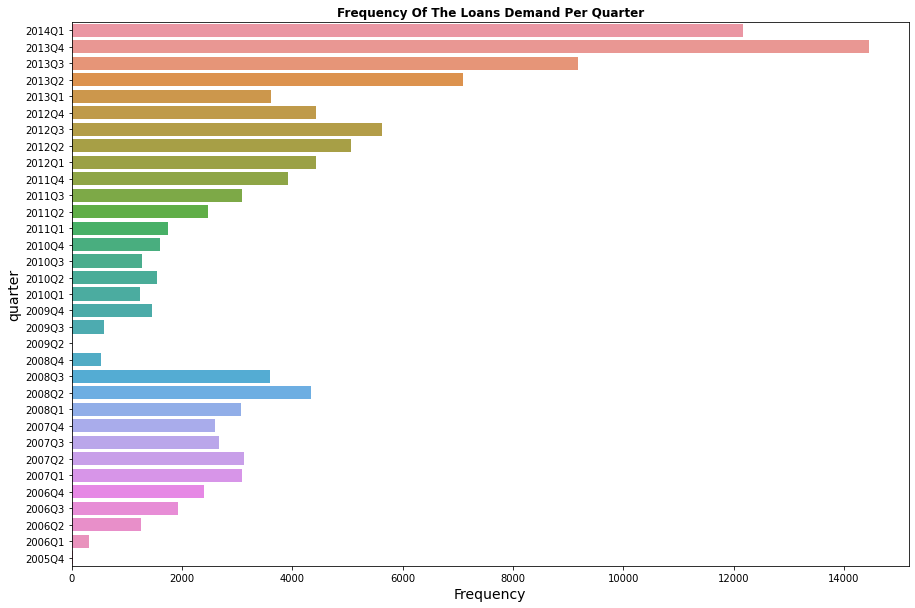

In [44]:
plt.figure(figsize=[15,10])
color=sb.color_palette()[0]
sb.countplot(data=loan_df,y="quarter");
#labels and title
plt.xlabel("Frequency",fontsize=14)
plt.ylabel("quarter",fontsize=14)
plt.title("Frequency of the loans demand per quarter".title(),weight='bold');

This graph is interesting because we can note that after 2009 Q2 we have extremly increase in the number of loans and the most high quarter is Q4 in 2013 with around 14,450 loan

#### Visualizing the histogram of Loan Original Amount
What fixed amount loan applicant are taking

<Figure size 864x576 with 0 Axes>

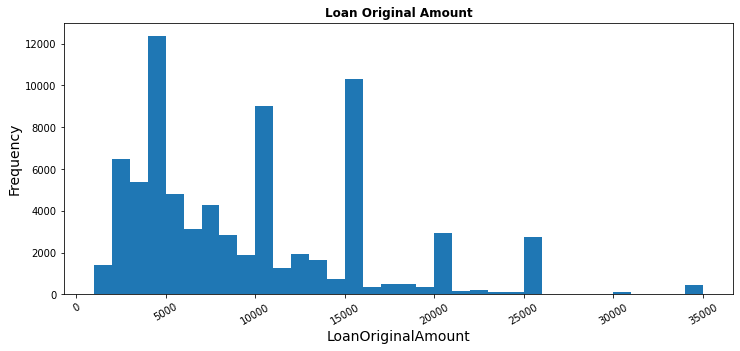

In [45]:
plt.figure(figsize=[12,8])
plot_histogram(loan_master,"LoanOriginalAmount","LoanOriginalAmount","Loan Original Amount",1000)

From the above histogram, we notice that people are interested in taking loans with fixed amount like 5K, 10K, 15K,20k,25k 

#### Histogram of the lende yield

<Figure size 864x576 with 0 Axes>

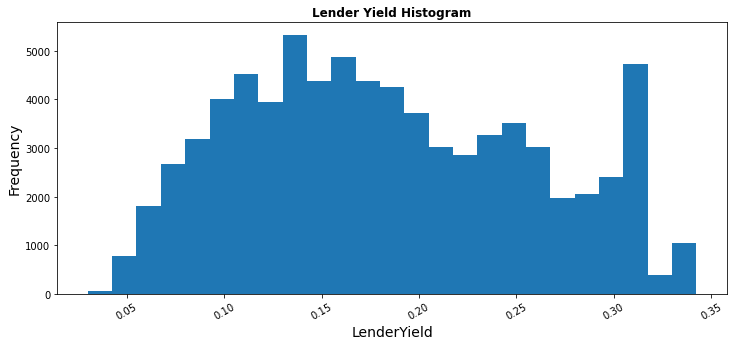

In [46]:
plt.figure(figsize=[12,8])
plot_histogram(loan_master,"LenderYield","LenderYield","Lender yield histogram",0.0125)

From the above plot data is skew to the left

#### The third thing we explore is features pertaining to  credit Risk metric

#### Distribution of prosper rating (alpha)
What is the highest proper rating alpha in the population of loan applicant?

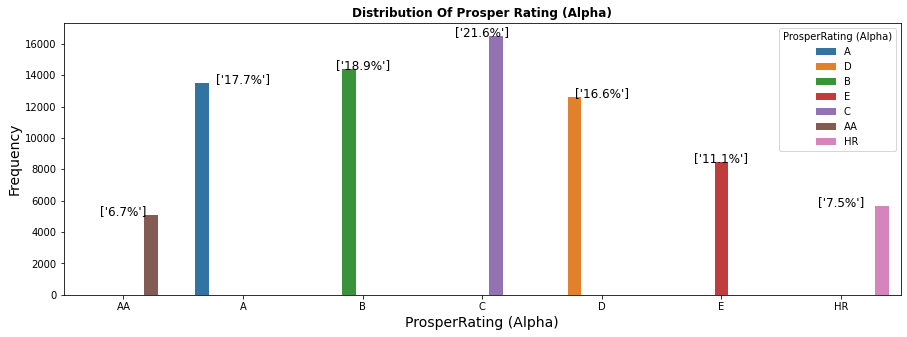

In [47]:
figsize=[15,5]
order=["AA","A","B","C","D","E","HR"]
plot_percent(figsize,loan_master,"ProsperRating (Alpha)",order,"ProsperRating (Alpha)","distribution of Prosper Rating (Alpha)")

21.6 percent of loan applicants got prosper rating alpha score C

#### Distribution of ProsperScore
What is the percentage of laon applicant getting the highest prosper score

Text(0.5, 0.92, 'Distribution Of Prosperscore')

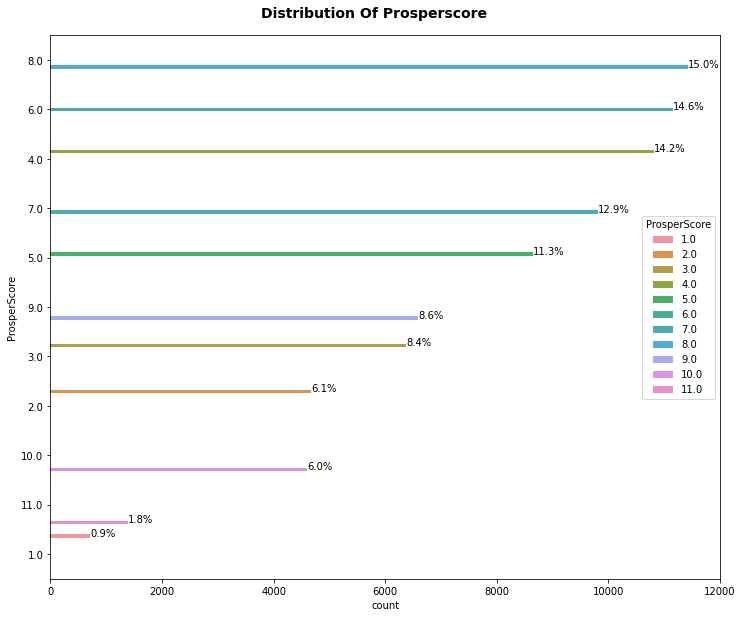

In [48]:
ax = plt.figure(figsize=(12,10))
ax = sb.countplot(data=loan_master, y='ProsperScore', hue='ProsperScore',
                 order=loan_master["ProsperScore"].value_counts().index)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/len(loan_master["ProsperScore"]))
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y));
plt.suptitle("Distribution of ProsperScore".title(),y=0.92,fontsize=14,weight='bold')

From the above plot, 15.0% applicant got a prosper score 8.0 and only 1.8% of loan applicant got a prosper score of 11.0

#### The distribution of the BorrowerAPR

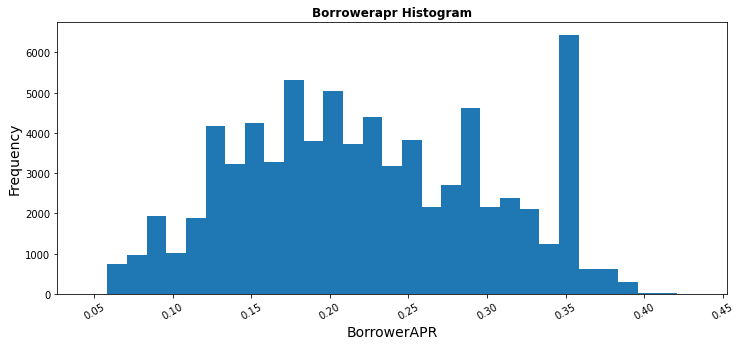

In [49]:
plot_histogram(loan_master,'BorrowerAPR','BorrowerAPR','BorrowerAPR histogram',0.0125)

From the above plot, we notice that it's multimodal distribution with peaks around 0.125, 0.188, 0.213, 0.288 and 0.380.

#### Distribution of the BorrowerRate

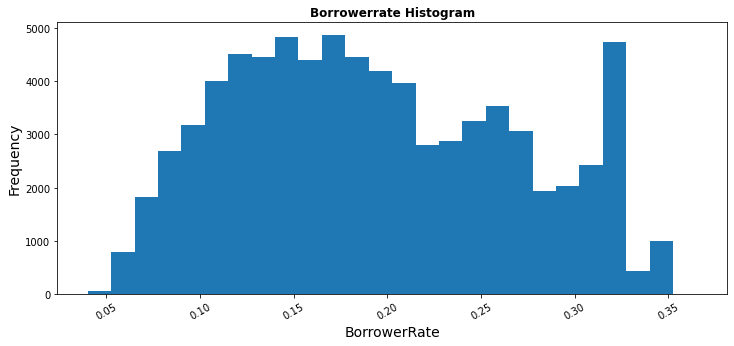

In [50]:
plot_histogram(loan_master,'BorrowerRate','BorrowerRate','BorrowerRate histogram',0.0125)

From the above plot, we have a multimodal distribution again skew to the left

#### Distribution of StateMonthlyIncome
What is the state monthly income in the pool of loan applicant

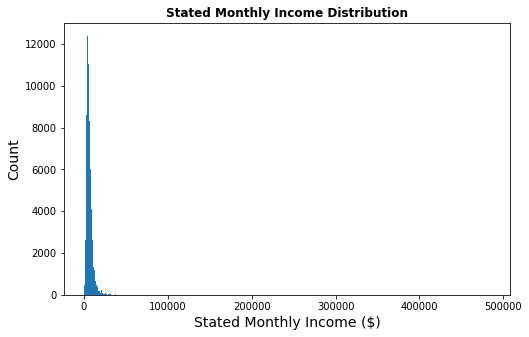

In [51]:
binsize = 1000
bins = np.arange(0, loan_master['StatedMonthlyIncome'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = loan_master, x = 'StatedMonthlyIncome', bins = bins)
plt.title('Stated Monthly Income Distribution'.title(),weight='bold')
plt.xlabel('Stated Monthly Income ($)',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.show()

From the plot above, no details can be seen due to high skewness and the far outliers above the 1000,000 so, lets see it in log-scale. It is much better to exlude the outliers as well by limiting the x-axis to $50,000



#### Using log-scale to plot the distribution of values less than 50k


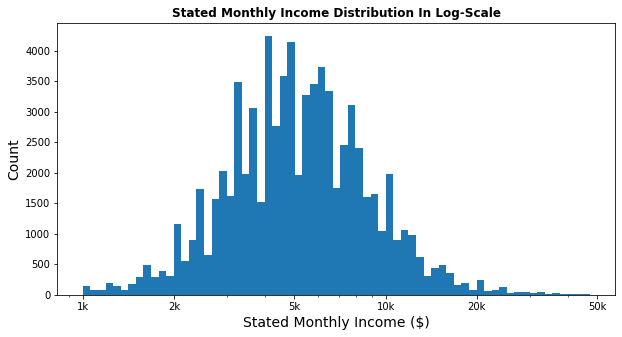

In [52]:
log_binsize = 0.025
bins = 10 ** np.arange(3, 4.7, log_binsize)
plt.figure(figsize=[10, 5])
plt.hist(data = loan_master, x = 'StatedMonthlyIncome', bins = bins)
plt.xscale('log')
plt.xticks([1e3, 2e3, 5e3, 1e4, 2e4, 5e4], ['1k', '2k','5k', '10k', '20k', '50k'])
plt.xlabel('Stated Monthly Income ($)',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.title('Stated Monthly Income Distribution in Log-scale'.title(),weight='bold')
plt.show()

From the above plot, we have a multimodal distribution with pick aroukd 5K and the majority of the loan applicant has mothly income below 10k

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

 The LoanStatus variable is a Categorical Nominal variable. We conclude from its distribution that the Current, Completed, Chargedoff & Defaulted are the most frequent status in the dataset.
 There was not need to perform to perform other transformations other than changing the datatype of some variable for better data exploration. Besides I notice that that there are some outliers in the StatedMonthlyIncome that are too far away from most of the values, these outliers are igonred by limiting the axis values.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The StatedMonthlyIncome variable took on a large range of values, so I looked at the data using a log transform. Under the transformation, the data looked highly skewed to the right, and that the majority of the borrowers in the dataset have a monthly income that's below 10,000. I wrangled the data because it has 1364086 missing values. Those missing values bring error into our analysis so we remove them before performing exploratory data analysis. 

## Bivariate Exploration

In this section, investigate relationships between pairs of variables in your
data.

#### Listing the features of interest according to their data type

In [53]:
num_vars = ['EstimatedEffectiveYield', 'BorrowerAPR', 'BorrowerRate', 'EmploymentStatusDuration', 
            'DebtToIncomeRatio', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'MonthlyLoanPayment']
categ_vars = ['Term', 'LoanStatus', 'ProsperRating (Alpha)', 'ProsperScore', 
              'Occupation', 'EmploymentStatus', 'IsBorrowerHomeowner', 'IncomeVerifiable', 
              'LoanOriginationQuarter', 'Recommendations']

#### Plotting the pair wire relation among the feature of interest

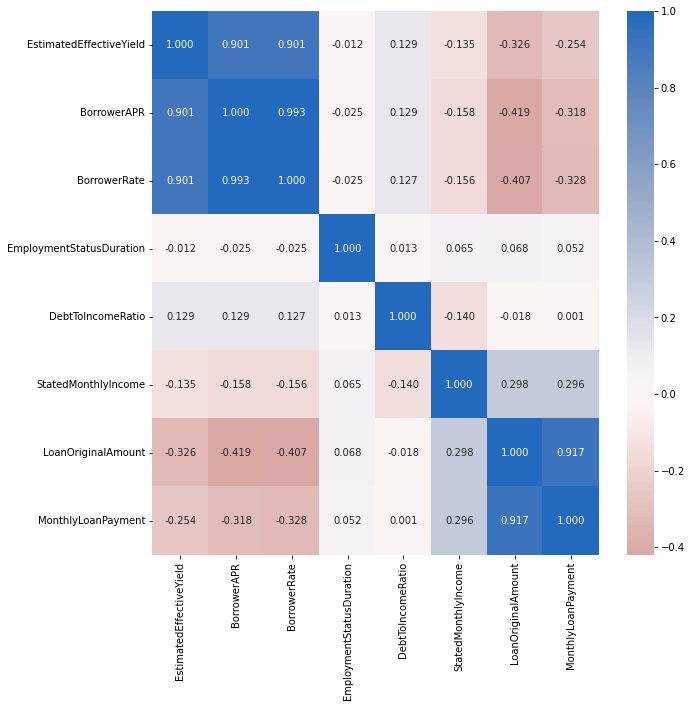

In [54]:
plt.figure(figsize = [10, 10])
sb.heatmap(loan_master[num_vars].corr(), annot=True, fmt = '.3f',cmap ='vlag_r', center = 0)
plt.show()

FRom the above correlation matrix, EstimateEffectiveYield, BorrowerAPR and BorrowerRate. Besides are highly corrolated.
Besides, LoanOriginal amount and monthlyPayment are also corrolated

#### Plotting pairwise data relationship of 500 observations

Text(0.5, 1, 'Plotting Pairwise Data Relationship Of 500 Observations')

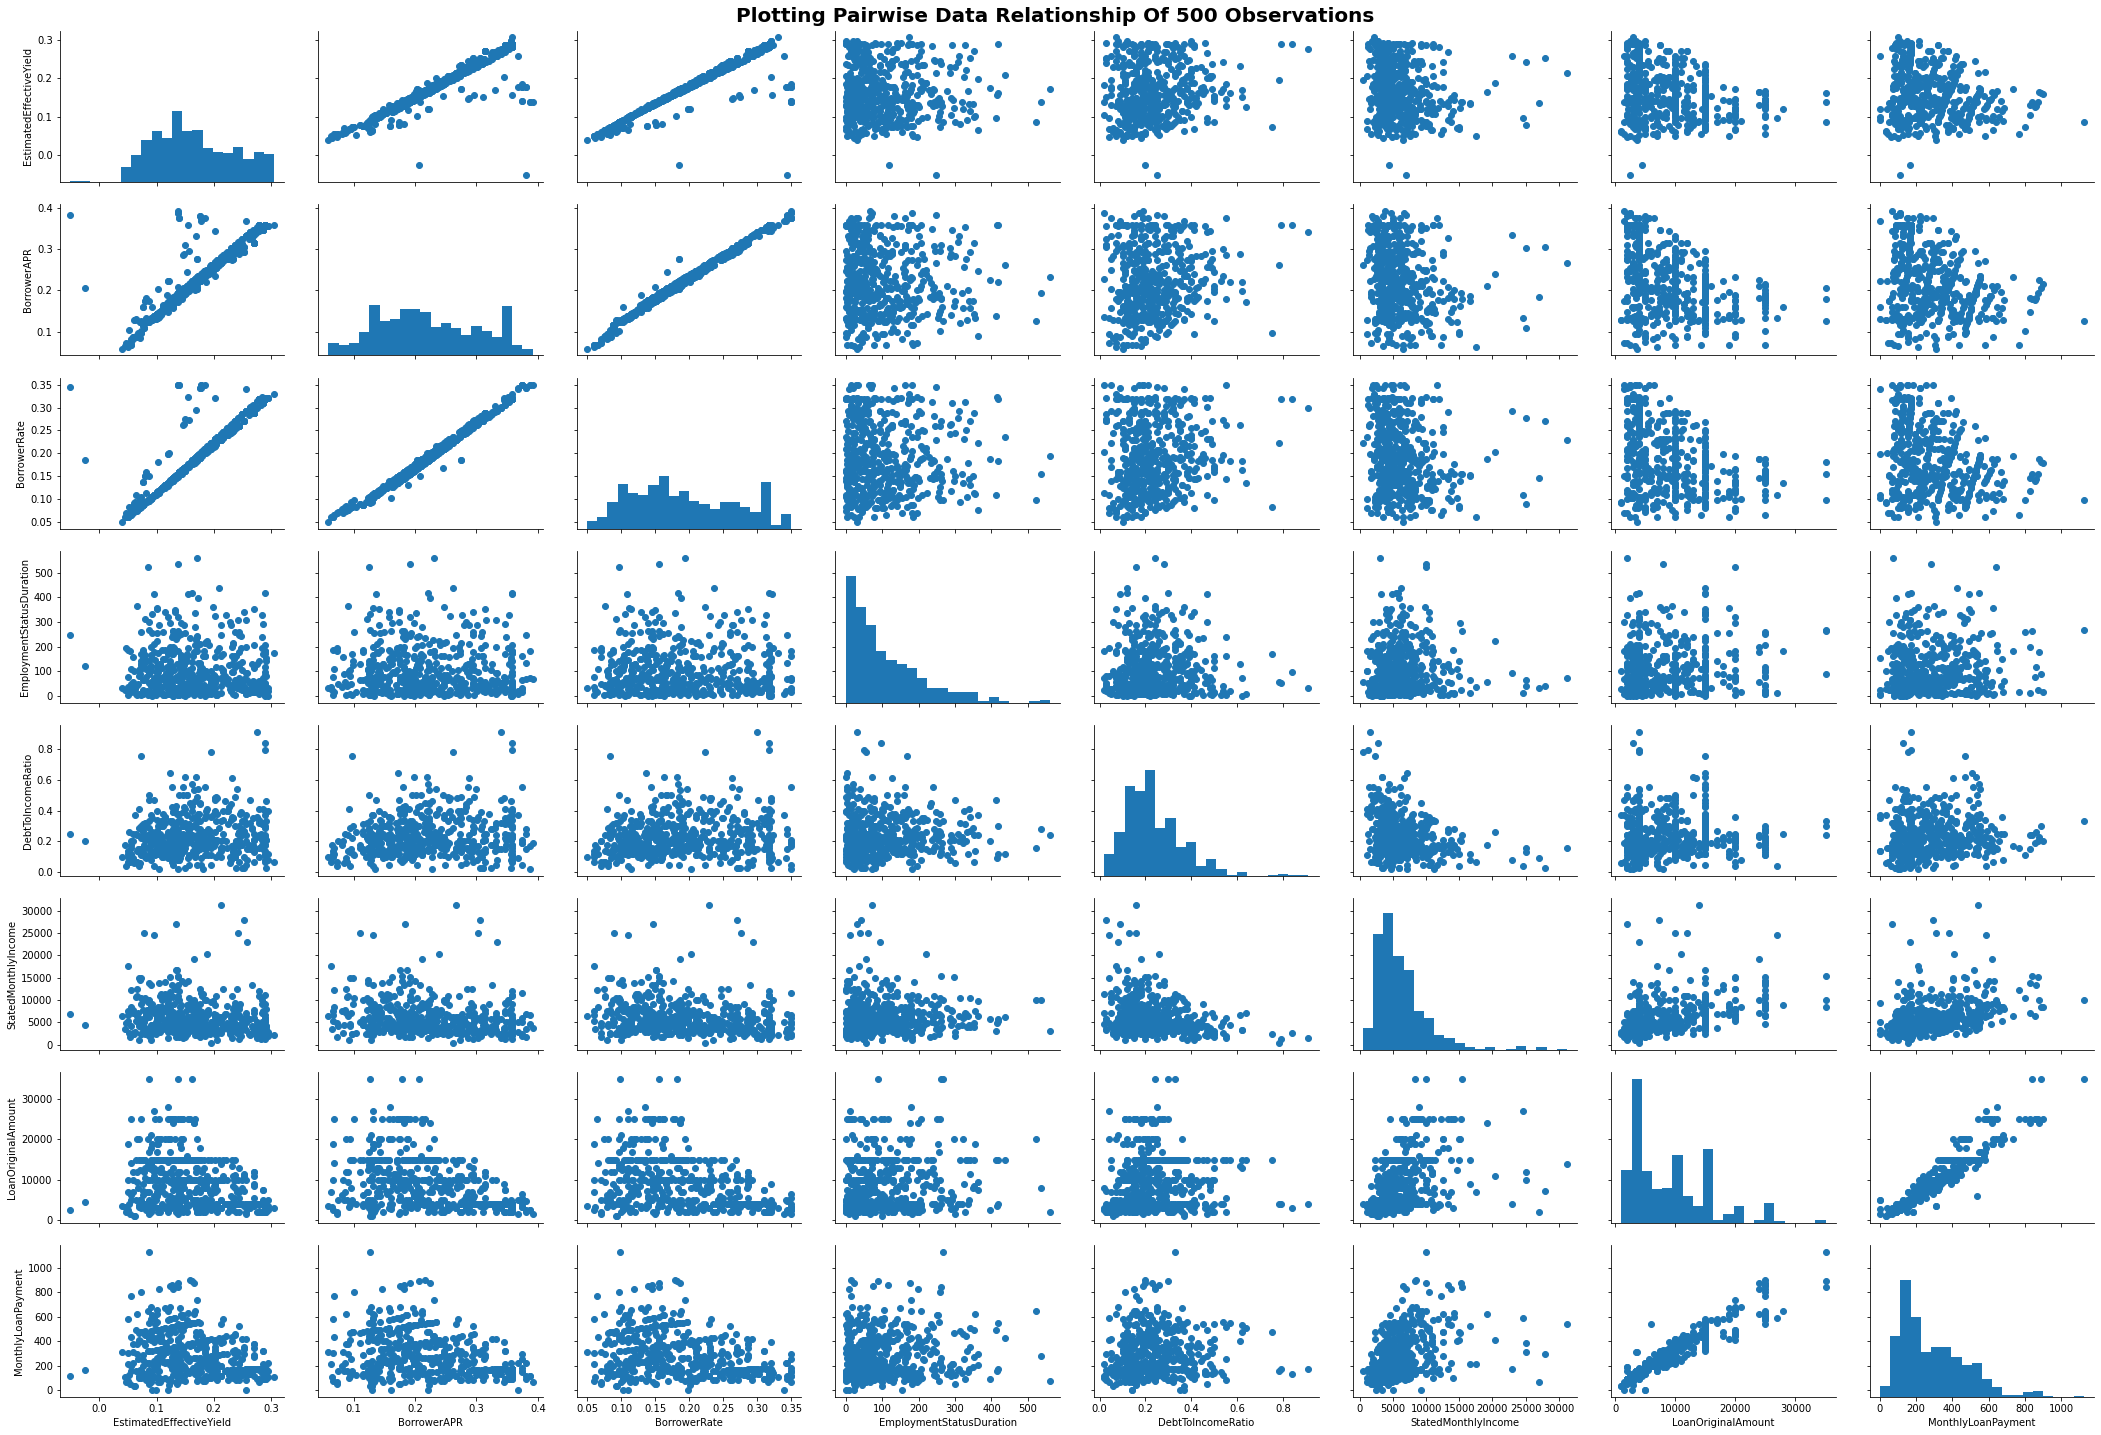

In [55]:
loan_master_sample = loan_master.sample(500)
g = sb.PairGrid(data = loan_master_sample, vars = num_vars)
g = g.map_diag(plt.hist, bins = 20)
g.map_offdiag(plt.scatter)
g.fig.set_size_inches(30,20)
plt.suptitle("Plotting pairwise data relationship of 500 observations".title(),y=1,fontsize=20,weight='bold')

As expected from the correlation matrix plot, the EstimatedEffectiveYield, BorrowerAPR and BorrowerRate are all highly correlated with one another.
Besides the LoanOriginalAmount and the MonthlyLoanPayment are highly correlated.

#### Defining a function to plot the correlation among bivariante feature

In [56]:
def plotCorrelation(df,feature_nameX,feature_nameY,title_nameX, color,XlabelX,YlabelX,title_nameY,XlabelY,YlabelY,T,Z):
    plt.figure(figsize = [15, 5]) 

    plt.subplot(1, 2, 1)
    bins_x = np.arange(0, df[feature_nameX].max()+T,Z)
    bins_y = np.arange(0, df[feature_nameY].max()+1, 1)
    plt.hist2d(data =df, x = feature_nameX, y = feature_nameY, bins = [bins_x, bins_y], 
                   cmap = color, cmin = 0.5)
    plt.colorbar()
    plt.title(title_nameX,fontsize=14)
    plt.xlabel(feature_nameX,fontsize=14)
    plt.ylabel(feature_nameY,fontsize=14);
    plt.subplot(1, 2, 2)
    plt.scatter(data = df, x = feature_nameX, y =feature_nameY, alpha =  0.005)
    plt.yticks(np.arange(0, 12, 1))
    plt.title(title_nameY,)
    plt.xlabel(feature_nameX,fontsize=14)
    plt.ylabel(feature_nameY,fontsize=14)

#### Checking the relation between ProsperScore and BorrowerAPR

Text(0.5, 1, 'Relation Between Prosperscore And Borrowerapr')

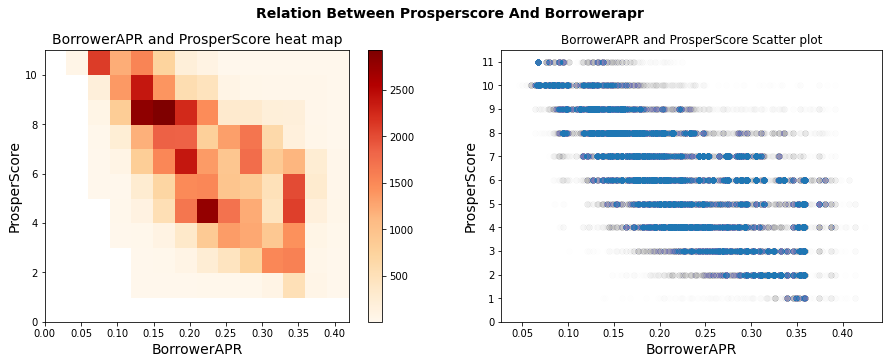

In [57]:
plotCorrelation(loan_master,'BorrowerAPR','ProsperScore','BorrowerAPR and ProsperScore heat map', 'OrRd','BorrowerAPR',
                'ProsperScore','BorrowerAPR and ProsperScore Scatter plot','BorrowerAPR','ProsperScore',0.02,0.03)
plt.suptitle("Relation between ProsperScore and BorrowerAPR".title(),y=1,fontsize=14,weight='bold')

From the above plot, a lower ProsperScore leads to higher borrower rate. This shows  that there is a negative relationship

#### Checking the relation between ProsperScore and StatedMonthlyIncome

Text(0.5, 1, 'Relation Between Prosperscore And Statedmonthlyincome')

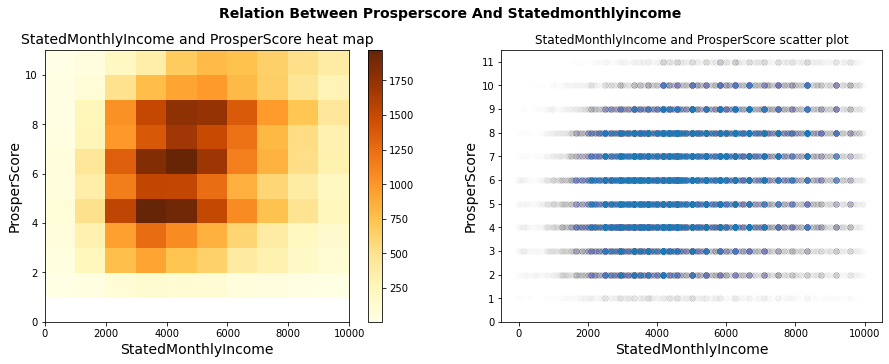

In [58]:
#filtering state montly income lower than 10k
loan_outlier=loan_master[loan_master['StatedMonthlyIncome'] < 10000]
plotCorrelation(loan_outlier,'StatedMonthlyIncome','ProsperScore','StatedMonthlyIncome and ProsperScore heat map',
                 'YlOrBr','StatedMonthlyIncome', 'ProsperScore','StatedMonthlyIncome and ProsperScore scatter plot',
                 'StatedMonthlyIncome','ProsperScore',1000,1000)
plt.suptitle("Relation between ProsperScore and StatedMonthlyIncome".title(),y=1,fontsize=14,weight='bold')

 From the above plot, ProsperScore is positively related to the stated monthly income

#### Plotting the relationship betwwen BorrowerAPR  and StatedMonthlyIncome

Text(0.5, 1, 'Relationship Betwwen Borrowerapr And Statedmonthlyincome')

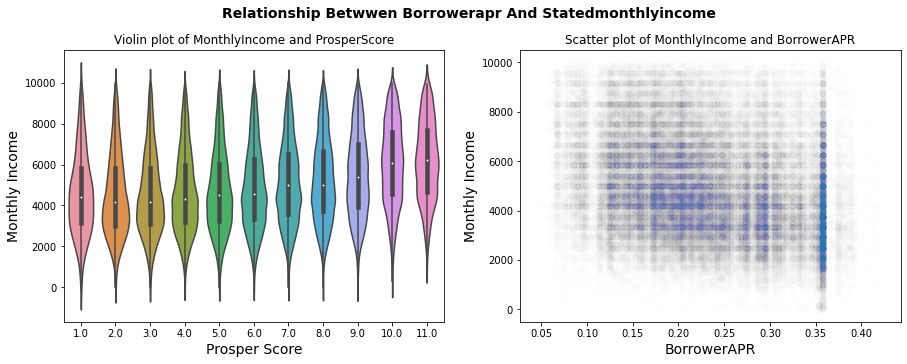

In [59]:
plt.figure(figsize = [15, 5])
plt.subplot(1, 2, 1)
sb.violinplot(data=loan_outlier,x='ProsperScore', y='StatedMonthlyIncome')
plt.xlabel('Prosper Score',fontsize=14);
plt.ylabel('Monthly Income',fontsize=14);
plt.title('Violin plot of MonthlyIncome and ProsperScore');

plt.subplot(1, 2, 2)
plt.scatter(data=loan_outlier,x='BorrowerAPR', y='StatedMonthlyIncome', alpha =  0.005);
plt.xlabel('BorrowerAPR',fontsize=14);
plt.ylabel('Monthly Income',fontsize=14);
plt.title('Scatter plot of MonthlyIncome and BorrowerAPR')
plt.suptitle("relationship betwwen BorrowerAPR and StatedMonthlyIncome".title(),y=1,fontsize=14,weight='bold')

From the  violin plot on left, we notice that that higher prosper scores have higher mean income symbolizing by the large of the head of the violet
On the right handwe notice that the higher the income, the lower the borrower rate.

#### Correlation between loan original amount and employment status

Text(0.5, 0.99, 'Loanoriginalamount & Employmentstatus')

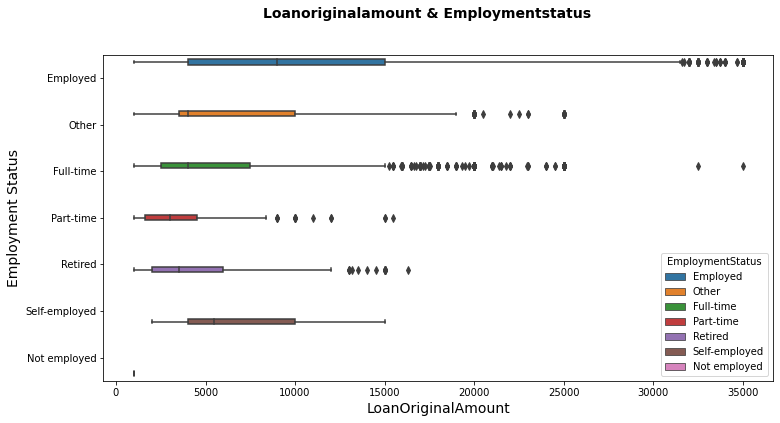

In [60]:
plt.figure(figsize = [12, 6])
sb.boxplot(data=loan_master,x='LoanOriginalAmount',y='EmploymentStatus',hue='EmploymentStatus');
plt.xlabel('LoanOriginalAmount',fontsize=14);
plt.ylabel('Employment Status',fontsize=14)
plt.suptitle("LoanOriginalAmount & EmploymentStatus".title(),y=0.99,fontsize=14,weight='bold')

From the above plot, we notice that employed loan applicant get large fund from prosper

#### Correlation between Borrower APR  and LoanStatus

In [61]:
#function to plot boxplot
def plot_boxplot(df,feature_nameX,feature_nameY,hue_feature,Xlabel,Ylabel,title_plot):
  sb.boxplot(data=df,x=feature_nameX,hue=hue_feature,y=feature_nameY);
  plt.xlabel(Xlabel,fontsize=14);
  plt.ylabel(Ylabel,fontsize=14);
  plt.title(title_plot)
  plt.show()



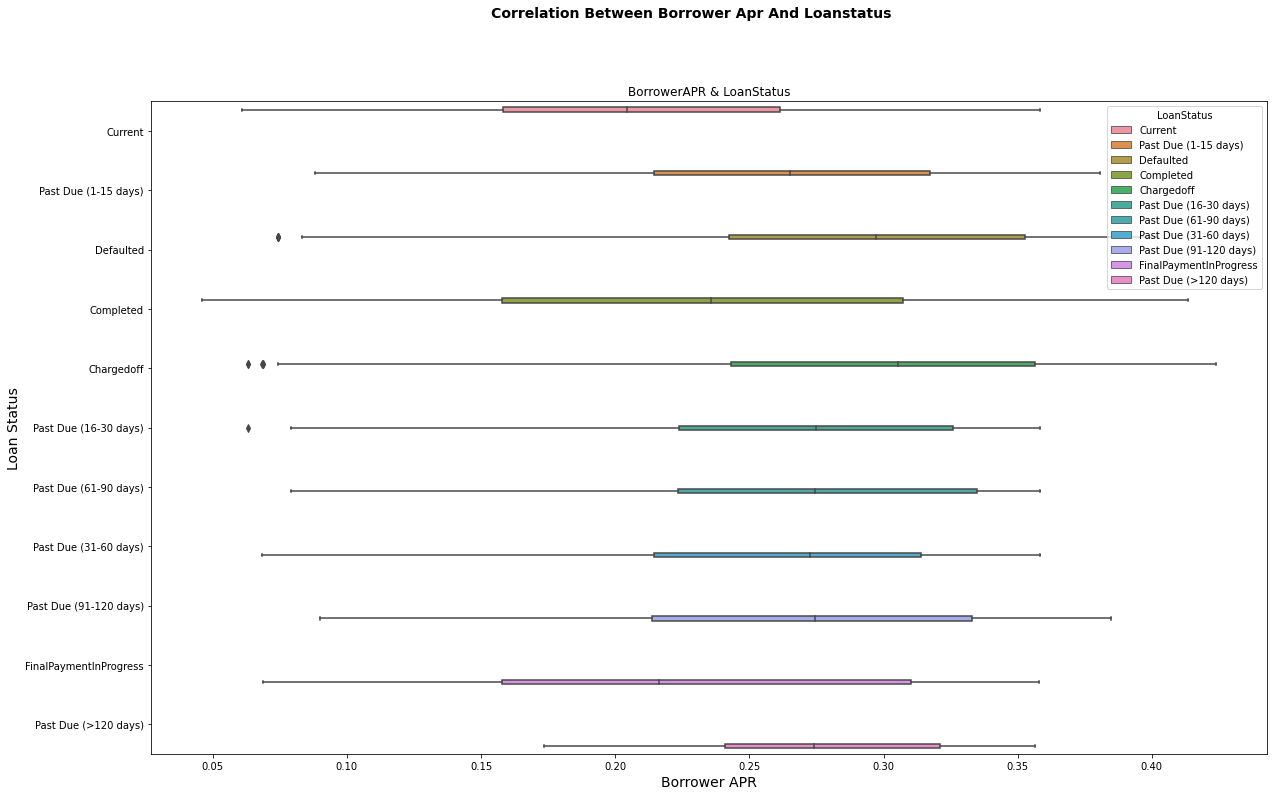

In [62]:
plt.figure(figsize = [20, 12])
plt.suptitle("Correlation between Borrower APR and LoanStatus".title(),y=0.99,fontsize=14,weight='bold')
plot_boxplot(loan_master,'BorrowerAPR','LoanStatus','LoanStatus','Borrower APR','Loan Status','BorrowerAPR & LoanStatus')

From the plot boxplot above, we notice that Current and completed loans have lower annual prosper rate than the past-due loans

#### Correlation between  Borrower APR and Employment status

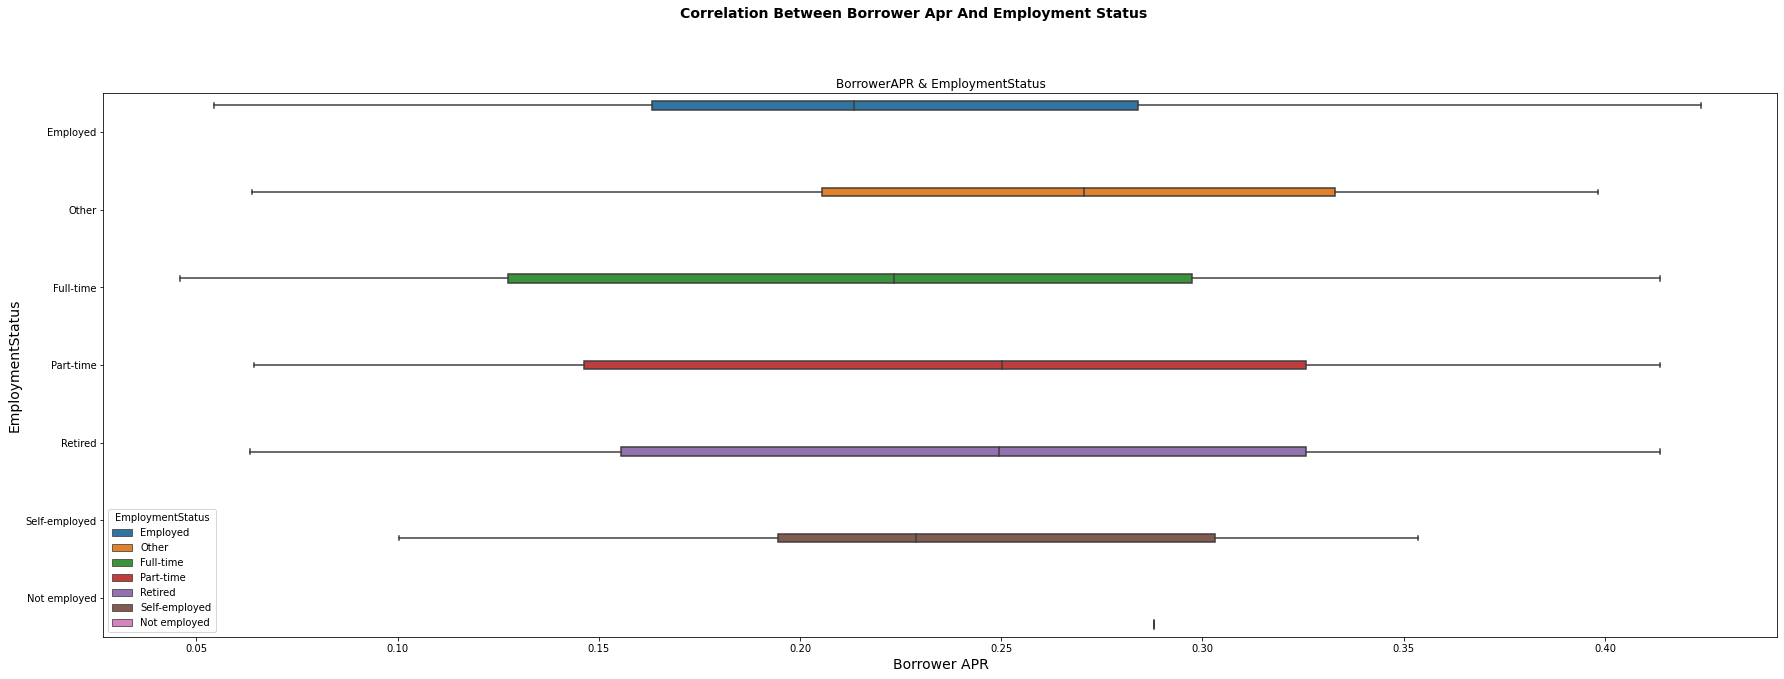

In [63]:
plt.figure(figsize = [30, 10])
plt.suptitle("Correlation between Borrower APR and Employment status".title(),y=1,fontsize=14,weight='bold')
plot_boxplot(loan_master,'BorrowerAPR','EmploymentStatus','EmploymentStatus','Borrower APR',
             'EmploymentStatus','BorrowerAPR & EmploymentStatus')


From the above plot, we notice that Employed people have lower rates than not employed

#### Correlation between EmploymentStatus and Loan Category

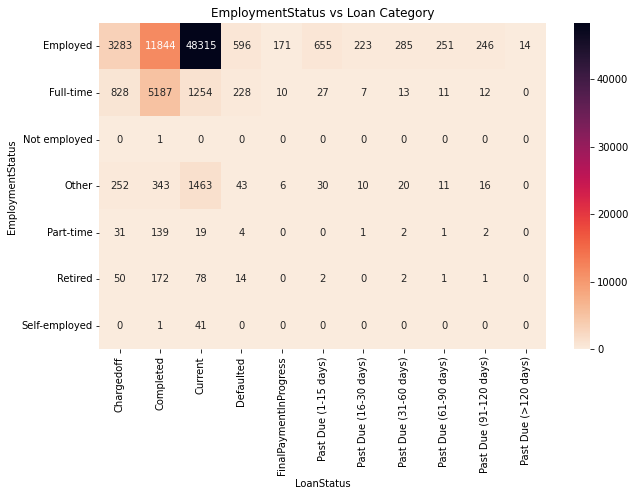

In [64]:
cat_counts = loan_master.groupby(['EmploymentStatus', 'LoanStatus']).count()['LoanOriginationDate']
cat_counts = cat_counts.reset_index()
cat_counts = cat_counts.rename(columns={'LoanOriginationDate': 'count'}) 
cat_counts = cat_counts.pivot(index = 'EmploymentStatus', columns = 'LoanStatus', values = 'count')
cat_counts.fillna(0, inplace=True)
plt.figure(figsize = [10, 6])
sb.heatmap(cat_counts, cmap = 'rocket_r', annot = True, fmt = ".0f")
plt.title('EmploymentStatus vs Loan Category');


We notice that most of employed loan applicant have their loan application complete

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
We notice that EmploymentStatus and StatedMonthlyIncome affect both of the main features (BorrowerAPR and ProsperScore)
- People who are not employed receive low score and high interest rate compared to the employed
- The higher the income, the higher the score and the lower the interest rate


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

We notice that EmploymentStatus has a relation with ProsperRating where the unemployed are mostly given a High Risk rating and the number of Defaulted loans for Self-employed people are larger than those for Not Employed.
Moreover, We saw strong correlations between variables like BorrowerAPR, BorrowerRate and EstimatedEffectiveYield also between MonthlyLoanPayment and LoanOriginalAmount and also between ProsperScore and ProsperRating (Alpha).


## Multivariate Exploration

The main thing we will explore in this part of the analysis is how the BorrowerAPR,LenderYield and ProsperScore affect the LoanStatus.

####  EmploymentStatus and ProsperScore against BorrowerAPR Scatter plot

In [75]:
#function to plot the scatterplot
def plot_faceplot(df,x,y,z):
  g = sb.FacetGrid(data = df[df[x] != 'Not available'],col =x, col_wrap = 3, size = 3)
  g.map(sb.scatterplot, y, z,hue=loan_master[x])
  g.set_xlabels(y,fontsize=14)
  g.set_ylabels(z,fontsize=14)
  g.add_legend()
  g.fig.set_size_inches(20,15)

Text(0.5, 1, 'Employmentstatus And Prosperscore Against Borrowerapr Scatter Plot')

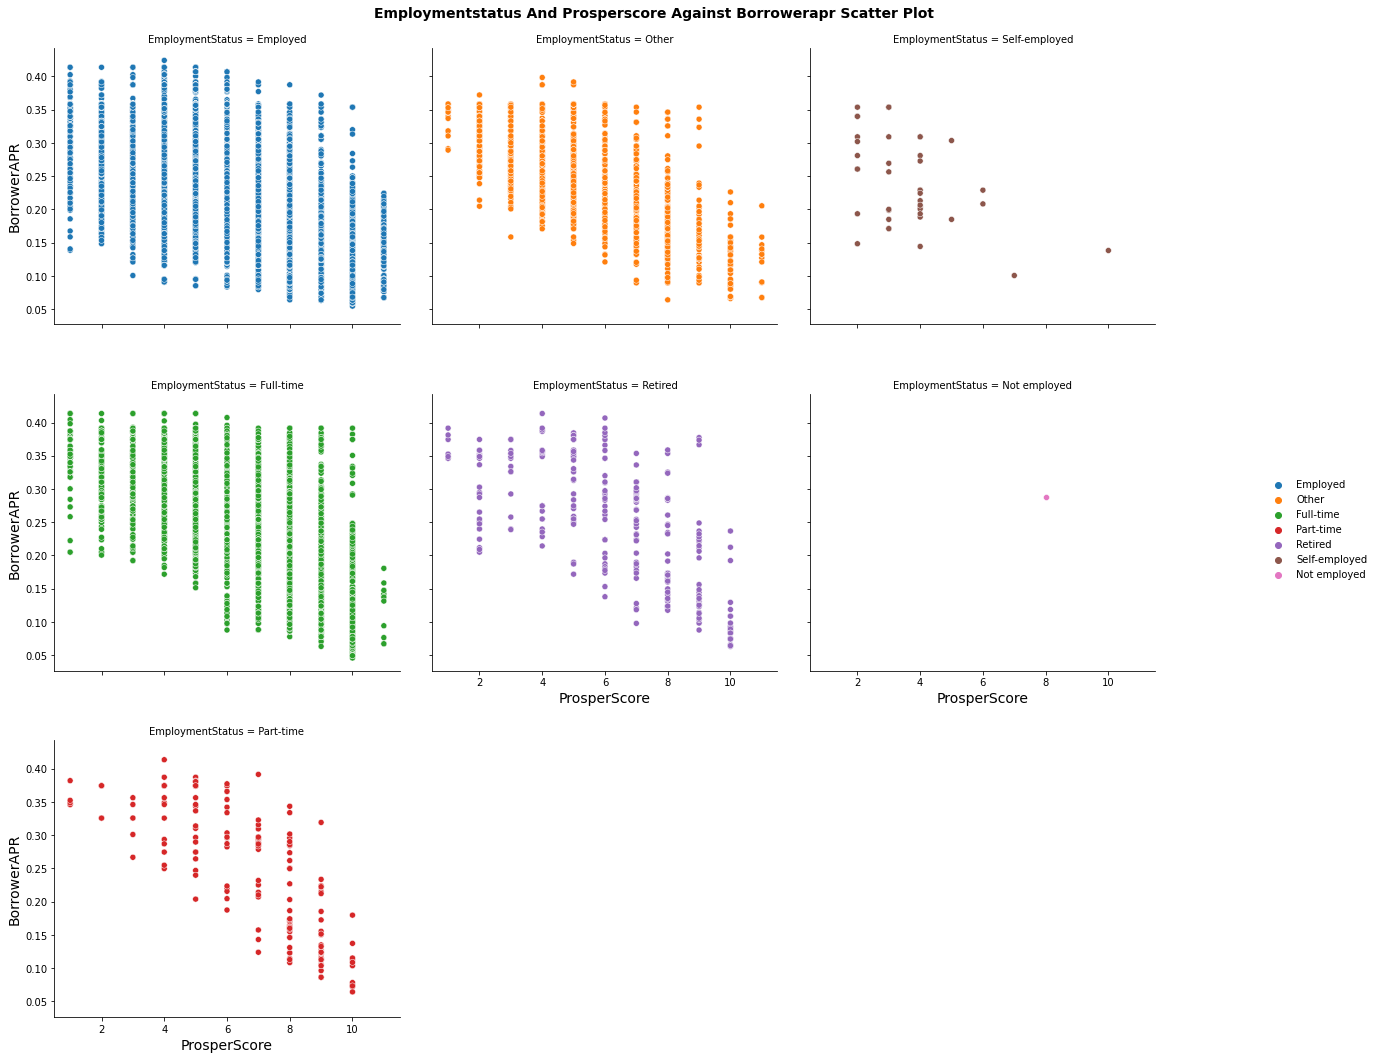

In [76]:
plot_faceplot(loan_df,'EmploymentStatus','ProsperScore','BorrowerAPR')
plt.suptitle("EmploymentStatus and ProsperScore against BorrowerAPR Scatter plot".title(),y=1,fontsize=14,weight='bold')

From the above scatter plot, we notice that
- Employed people are diverse regarding the ProsperScore and BorrowerAPR
- Full-Time and part-time tend to have higher ProsperScore and lower BorrowerAPR
- Not-Employed & Self-Employed tend to have lower ProsperScore and higher BorrowerAPR
- Retired people have higher ProsperScore and lower BorrowerAPR


#### Violinplot of EmploymentStatus vs BorrowerAPR in each LoanStatus

In [67]:
#function to plot violent plot 
def violent_plot(list_feature,df,feature_nameX,feature_nameY):
  for k in range(len(list_feature)):
    categorical_feature= list_feature[k]
    sb.violinplot(data = loan_master, x =  categorical_feature, y = feature_nameX, ax = ax[k,0]   )
    ax[k,0].set_xticklabels(labels=df[ categorical_feature].value_counts().sort_index().index, rotation=90)
    sb.violinplot(data =df, x =  categorical_feature, y = feature_nameY, ax = ax[k,1] )        
    ax[k,1].set_xticklabels(labels=df[ categorical_feature].value_counts().sort_index().index, rotation=90)


Text(0.5, 0.9, 'Violinplot Of Prosperscore, Borrowerapr Against Loanoriginalamount')

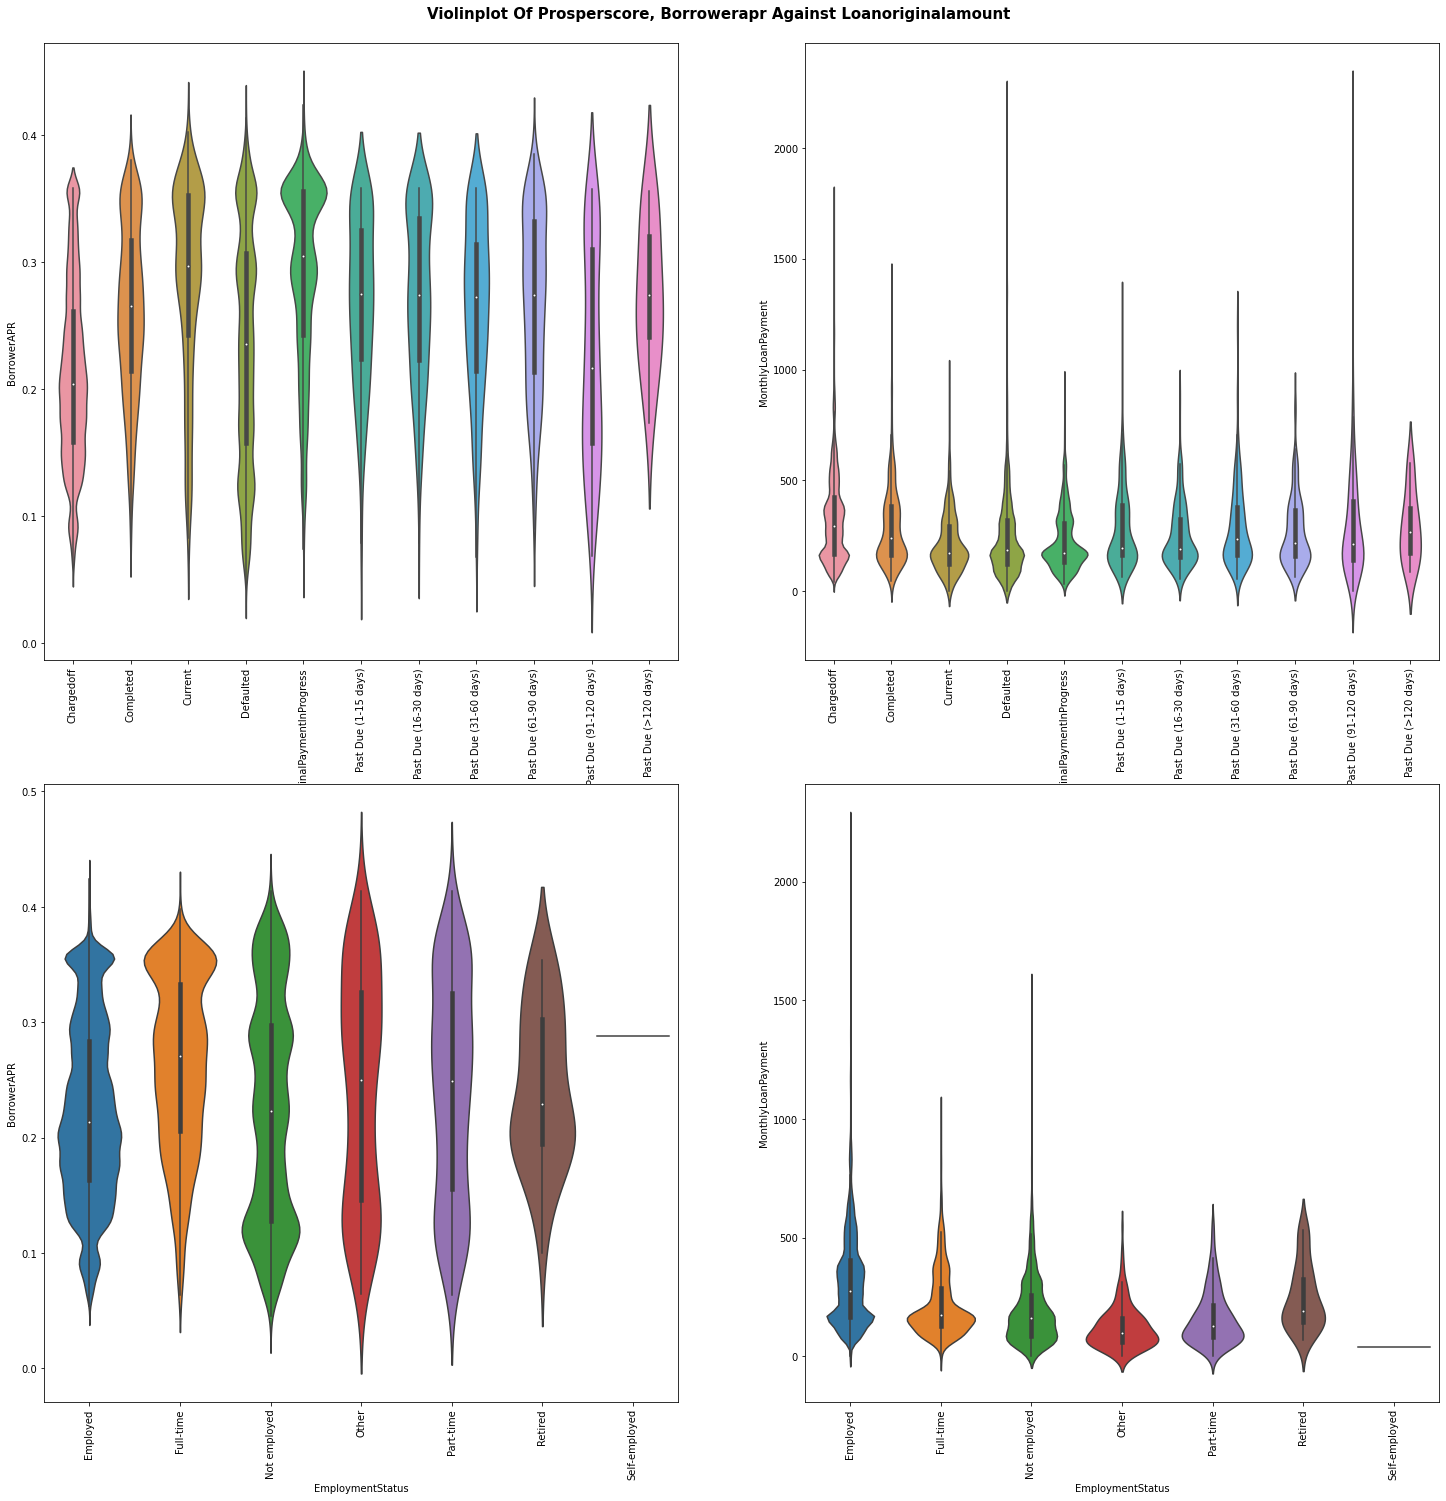

In [68]:
fig, ax = plt.subplots(ncols = 2, nrows = 2 , figsize = [25,25])
list_feature = ['LoanStatus', 'EmploymentStatus']
violent_plot(list_feature,loan_master,'BorrowerAPR','MonthlyLoanPayment')
plt.suptitle("violinplot of ProsperScore, BorrowerAPR against LoanOriginalAmount".title(),y=0.90,fontsize=15,weight='bold')

From the above plot, we can see that loans with Chargedoff & Defaulted status tend to have a higher BorrowerAPR on average. We can see also that the BorrowerAPR is least for those with the highest ProsperScore. Besides, BorrowerAPR tends to be highest for those with the lowest ProsperScore. We can also see that borrowers with Part-time EmploymentStatus have the lowest MonthlyLoanPayment on average. Similarly those who have the lowest ProsperScore have the lowest MonthlyLoanPayment. We can also see that the defaulted and chargedoff loans have the lowest StatedMonthlyIncome on average.

#### Scatter plot of ProsperScore, BorrowerAPR against  LoanOriginalAmount

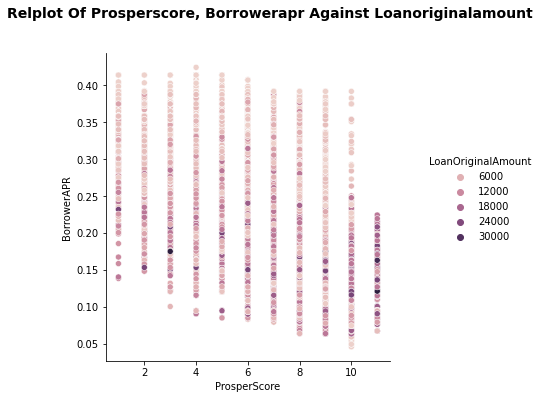

In [69]:
sb.relplot(x="ProsperScore", y="BorrowerAPR", hue="LoanOriginalAmount", data=loan_master)
plt.suptitle("Relplot of ProsperScore, BorrowerAPR against LoanOriginalAmount".title(),y=1.1,fontsize=14,weight='bold')
plt.show()

The above scatter plot shows a negative correlation between ProsperScore and BorrowAPR. 
Moreover, the plot reveals that most of the loan original amount greater than 20k is 
taken by the pool of loan applicant having prosper score between 10 and 11


#### Regplot of LoanOriginalAmount, BorroweAPR vs LoanStatus

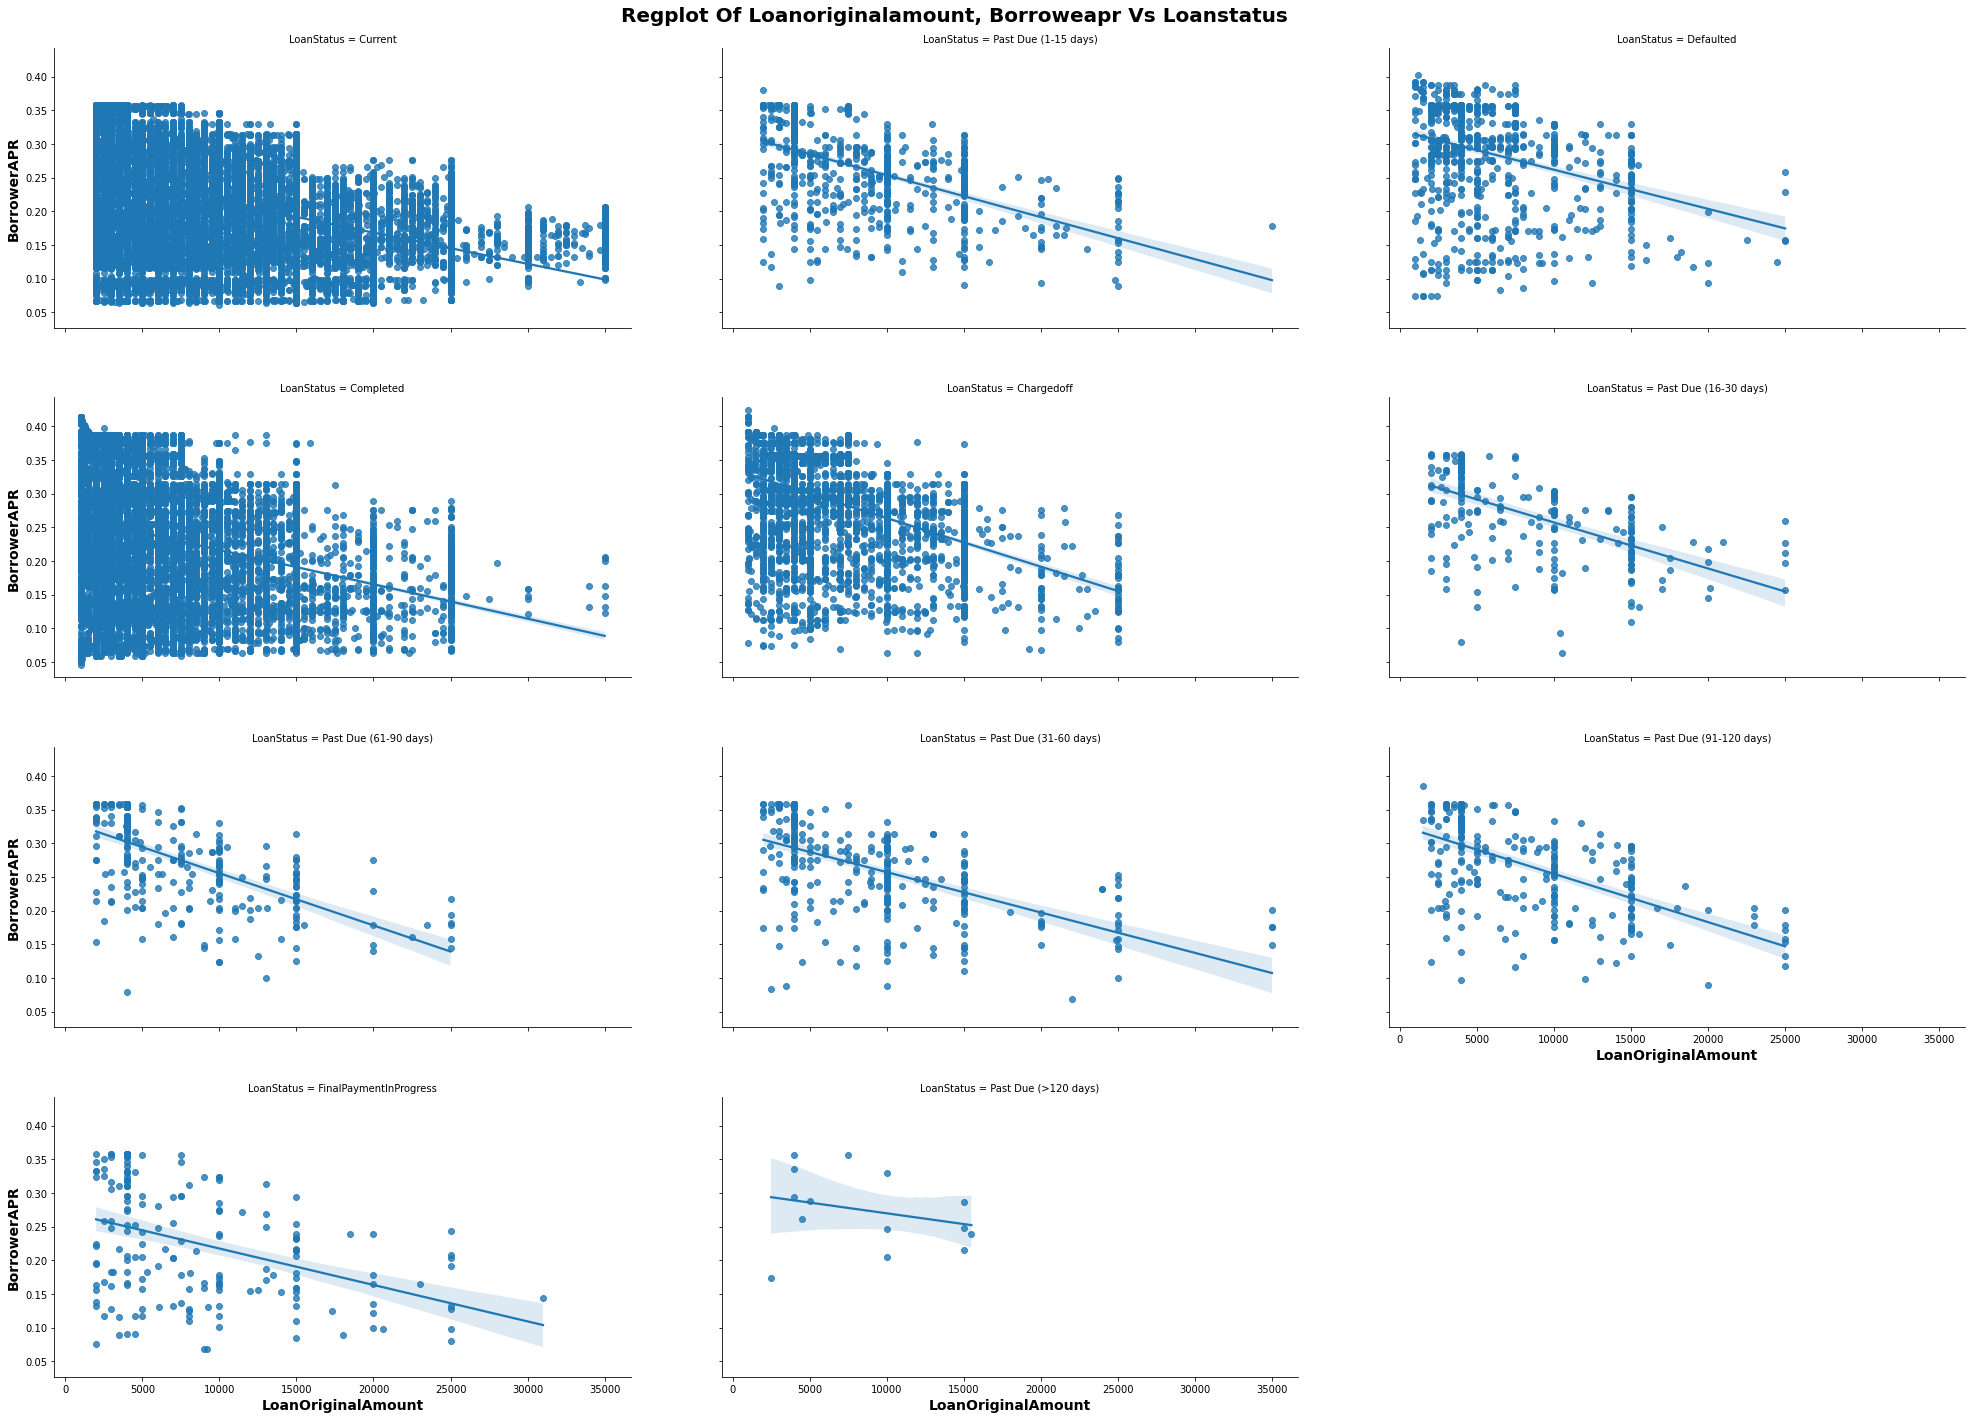

In [70]:
g = sb.FacetGrid(data = loan_master, col = 'LoanStatus', col_wrap = 3, size = 3)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR')
g.set_xlabels('LoanOriginalAmount',fontsize=14,weight='bold')
g.set_ylabels('BorrowerAPR',fontsize=14,weight='bold')
plt.suptitle("Regplot of LoanOriginalAmount, BorroweAPR vs LoanStatus".title(),y=1,fontsize=20,weight='bold')
g.fig.set_size_inches(30,20)
plt.show()

The above plot shows that BorrowerAPR, LoanOriginalAmount are negatively correlated
So the higher the loan amount gets the lower the interest rate becomes.

#### Scatter plot of LenderYield and Borrower APR  against ProsperScore

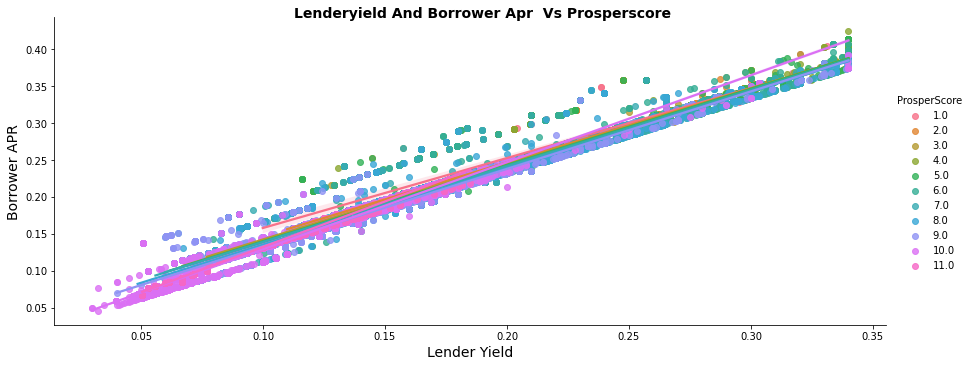

In [72]:
g = sb.lmplot(x="LenderYield", y="BorrowerAPR",hue='ProsperScore',scatter=True,fit_reg=True,aspect=2.5, data=loan_master)
plt.xlabel('Lender Yield',fontsize=14)
plt.ylabel('Borrower APR',fontsize=14)
plt.suptitle("LenderYield and Borrower APR  vs ProsperScore".title(),y=1,fontsize=14,weight='bold')
plt.show()

The above plot shows that there is a strong positive correlation between lender yield and BorrowerAPR
Furthermore, looking at the diagonal axis, it reveals that most of loan applicants with lower BorrowerAPR and LenderYield have higher ProsperScore. Conversely, loan applicants with higher BorrowerAPR and LenderYield tend to  have lower ProsperScore

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?


**Relation between LenderYield and Borrower APR  vs ProsperScore**<br>
There is a strong positive correlation between lenderYield and BorrowerAPR Furthermore, looking at the diagonal axis, it reveals that most of loan applicants with lower BorrowerAPR and LenderYield have higher ProsperScore


**Relation between EmploymentStatus, ProsperScore vs BorrowerAPR**<br>

Full-Time and part-time tend to have higher ProsperScore and lower BorrowerAPR<br>
Not-Employed & Self-Employed tend to have lower ProsperScore and higher BorrowerAPR<br>
Retired people have higher ProsperScore and lower BorrowerAPR<br>


### Were there any interesting or surprising interactions between features?

We notice that loans with  LoanOriginalAmount greater than $20k are taken by people with ProsperScore betwwen 10 and 11
Besides, The relationship between the BorrowerAPR and the LoanOriginalAmount was found to be negative. The higher loan amount is, the lower the interest rate tends to be and that applies to different loan status.

## Conclusions

The LoanStatus was the main feature of interest from its mode we found that Current was the most frequent attribute. Besides I notice that that there were some outliers in the StatedMonthlyIncome that are too far away from most of the values, these outliers are igonred by limiting the axis values. After cleaning our dataframe from 1364086 missing values we were left with 76216 observations and 62 features. Furthermore, out of the 62 features, we had 50 numerical, 9 categorial and 3 boolean features respectively. We selected out of the 62 features, 17 features of interest to carry out respectively univariante, bivariante and multivariante data exploration to figure out correlation among the feature of interests in our loan master dataframe namely the LoanStatus, ProsperScore, BorrowerAPR and LenderYield. In univariante exploration, we found unusual distribution in StatedMonthlyIncome it was skewed to the right. We use log scale to transform the data for better visualisation. Furtermore, in bivariante exploration, we notice that EmploymentStatus has a relationship with ProsperRating where the unemployed are mostly given a High Risk rating and the number of Defaulted loans for Self-employed people are larger than those for Not Employed. Moreover, We saw strong correlations between features like BorrowerAPR, BorrowerRate and EstimatedEffectiveYield; between MonthlyLoanPayment and LoanOriginalAmount; between ProsperScore and ProsperRating (Alpha). finally, in multivariante exploration,we found positive correlation between LenderYield and BorrowerAPR. We also noticed that most of loan applicants with lower BorrowerAPR and LenderYield have higher ProsperScore. We figured out from the exploration that Full-Time and part-time tend to have higher ProsperScore and lower BorrowerAPR,Not-Employed and Self-Employed tend to have lower ProsperScore and higher BorrowerAPR and Retired people have higher ProsperScore and lower BorrowerAPR<br>

References:<br>
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html<br>
https://stackoverflow.com/questions/25050141/how-to-filter-in-nan-pandas<br>
https://stackoverflow.com/questions/51070985/find-out-the-percentage-of-missing-values-in-each-column-in-the-given-dataset<br>
https://seaborn.pydata.org/tutorial.html<br>
https://seaborn.pydata.org/tutorial/axis_grids.html<br>
https://seaborn.pydata.org/generated/seaborn.FacetGrid.html<br>
https://seaborn.pydata.org/generated/seaborn.violinplot.html<br>
https://seaborn.pydata.org/generated/seaborn.pointplot.html<br>
https://seaborn.pydata.org/generated/seaborn.regplot.html<br>
https://stackoverflow.com/questions/46307941/how-can-i-add-title-on-seaborn-lmplot
